In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter 
import itertools
import statistics
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
import scipy.stats as st

### Exploratory Data Analysis

## Batting Data

In [2]:
Batsmen_data=pd.read_csv("Batsmen_Data.csv")
Batsmen_data.shape

(117, 11)

### Drop the Matches_Bat feature as it is not an important feature

In [3]:
Batsmen_data.drop(['Matches_Bat'],axis=1,inplace=True)
Batsmen_data.head()

,Batsmen_Rating,Innings_Bat,Runs_Scored_Bat,Batting_Average_Bat,Batting_Strike_Rate_Bat,Centuries_Bat,Double_Centuries_Bat,Fifties_Bat,Fours_Bat,Sixes_Bat
0,879,38,1471,50.72,128.14,0,0,13,146,21
1,435,2,21,10.50,84.00,0,0,0,2,0
2,470,2,18,9.00,105.88,0,0,0,1,1
3,280,11,238,21.64,136.00,0,0,2,24,10
4,584,58,1665,32.65,125.00,0,0,11,170,36


### Get the unique values of Double_Centuries_Bat

In [4]:
Batsmen_data['Double_Centuries_Bat'].unique()

array([0], dtype=int64)

### We have only 0 values in Double Centuries column. So, it is not a valid feature. We can drop this feature

In [5]:
Batsmen_data.drop(['Double_Centuries_Bat'],axis=1,inplace=True)
Batsmen_data.head()

,Batsmen_Rating,Innings_Bat,Runs_Scored_Bat,Batting_Average_Bat,Batting_Strike_Rate_Bat,Centuries_Bat,Fifties_Bat,Fours_Bat,Sixes_Bat
0,879,38,1471,50.72,128.14,0,13,146,21
1,435,2,21,10.50,84.00,0,0,2,0
2,470,2,18,9.00,105.88,0,0,1,1
3,280,11,238,21.64,136.00,0,2,24,10
4,584,58,1665,32.65,125.00,0,11,170,36


In [6]:
Batsmen_data['Centuries_Bat'].value_counts()

0    98
1    11
2     5
3     2
4     1
Name: Centuries_Bat, dtype: int64

### We can see that almost 81% of the players didn't score a century. So we can drop this feature as it does not provide any value

In [7]:
Batsmen_data.drop(['Centuries_Bat'],axis=1,inplace=True)
Batsmen_data

,Batsmen_Rating,Innings_Bat,Runs_Scored_Bat,Batting_Average_Bat,Batting_Strike_Rate_Bat,Fifties_Bat,Fours_Bat,Sixes_Bat
0,879,38,1471,50.72,128.14,13,146,21
1,435,2,21,10.50,84.00,0,2,0
2,470,2,18,9.00,105.88,0,1,1
3,280,11,238,21.64,136.00,2,24,10
4,584,58,1665,32.65,125.00,11,170,36
...,...,...,...,...,...,...,...,...
112,641,85,2536,32.51,134.61,15,226,119
113,687,86,2138,30.99,137.49,13,160,105
114,407,88,1992,25.22,116.63,11,208,52
115,509,89,1672,21.16,136.05,3,137,76


In [8]:
Batsmen_data

,Batsmen_Rating,Innings_Bat,Runs_Scored_Bat,Batting_Average_Bat,Batting_Strike_Rate_Bat,Fifties_Bat,Fours_Bat,Sixes_Bat
0,879,38,1471,50.72,128.14,13,146,21
1,435,2,21,10.50,84.00,0,2,0
2,470,2,18,9.00,105.88,0,1,1
3,280,11,238,21.64,136.00,2,24,10
4,584,58,1665,32.65,125.00,11,170,36
...,...,...,...,...,...,...,...,...
112,641,85,2536,32.51,134.61,15,226,119
113,687,86,2138,30.99,137.49,13,160,105
114,407,88,1992,25.22,116.63,11,208,52
115,509,89,1672,21.16,136.05,3,137,76


## Bowling Data

In [9]:
Bowler_data=pd.read_csv("Bowling_Data.csv")
Bowler_data.head()

,Bowler_Rating,Matches_Bowl,Innings_Bowl,Wickets_Bowl,Economy_Bowl,Bowling_Average_Bowl,Bowling_Strike_Rate_Bowl,FiveWickets_Bowl,TenWickets_Bowl
0,736,48,48,89,6.14,12.63,12.34,2,0
1,730,19,19,25,6.15,17.72,17.28,0,0
2,713,30,29,33,6.13,19.03,18.64,0,0
3,712,24,24,25,6.73,21.28,18.96,1,0
4,681,22,22,17,7.45,35.06,28.24,0,0


### Drop the Matches_Bowl feature as it is not an important feature

In [10]:
Bowler_data.drop(['Matches_Bowl'],axis=1,inplace=True)
Bowler_data.head()

,Bowler_Rating,Innings_Bowl,Wickets_Bowl,Economy_Bowl,Bowling_Average_Bowl,Bowling_Strike_Rate_Bowl,FiveWickets_Bowl,TenWickets_Bowl
0,736,48,89,6.14,12.63,12.34,2,0
1,730,19,25,6.15,17.72,17.28,0,0
2,713,29,33,6.13,19.03,18.64,0,0
3,712,24,25,6.73,21.28,18.96,1,0
4,681,22,17,7.45,35.06,28.24,0,0


### Get the unique values of TenWickets_Bowl

In [11]:
Bowler_data['TenWickets_Bowl'].unique()

array([0], dtype=int64)

### We have only 0's in TenWickets_Bowl. So, it is not a valid feature. We can drop this feature

In [12]:
Bowler_data.drop(['TenWickets_Bowl'],axis=1,inplace=True)
Bowler_data.head()

,Bowler_Rating,Innings_Bowl,Wickets_Bowl,Economy_Bowl,Bowling_Average_Bowl,Bowling_Strike_Rate_Bowl,FiveWickets_Bowl
0,736,48,89,6.14,12.63,12.34,2
1,730,19,25,6.15,17.72,17.28,0
2,713,29,33,6.13,19.03,18.64,0
3,712,24,25,6.73,21.28,18.96,1
4,681,22,17,7.45,35.06,28.24,0


In [13]:
Bowler_data['FiveWickets_Bowl'].value_counts()

0    93
1    13
2     3
Name: FiveWickets_Bowl, dtype: int64

In [14]:
Bowler_data.drop(['FiveWickets_Bowl'],axis=1,inplace=True)
Bowler_data.head()

,Bowler_Rating,Innings_Bowl,Wickets_Bowl,Economy_Bowl,Bowling_Average_Bowl,Bowling_Strike_Rate_Bowl
0,736,48,89,6.14,12.63,12.34
1,730,19,25,6.15,17.72,17.28
2,713,29,33,6.13,19.03,18.64
3,712,24,25,6.73,21.28,18.96
4,681,22,17,7.45,35.06,28.24


### AllRounder Data

In [15]:
AllRounder_data=pd.read_csv("Allrounder_Data.csv")
AllRounder_data

,Allrounder_Rating,Matches_As_Bat_AllRounder,Innings_Bat_AllRounder,Runs_Scored_AllRounder,Batting_Average_AllRounder,Batting_Strike_Rate_AllRounder,Centuries_AllRounder,Double_Centuries_AllRounder,Fifties_AllRounder,Fours_AllRounder,Sixes_AllRounder,Innings_As_Bowl_Allrounder,Wickets_AllRounder,Economy_AllRounder,Bowling_Average_AllRounder,Bowling_Strike_Rate_AllRounder,FiveWickets_AllRounder,TenWickets_AllRounder
0,213,40,40,844,24.11,129.85,0,0,8,78,26,39,32,7.21,29.28,24.38,0,0
1,204,61,54,1576,35.02,160.00,3,0,9,135,81,40,26,7.49,27.08,21.69,0,0
2,170,23,21,436,24.22,150.34,0,0,4,40,20,20,19,7.41,24.58,19.89,0,0
3,159,31,31,601,20.72,99.67,0,0,4,68,14,30,35,6.48,16.86,15.60,0,0
4,153,31,29,621,27.00,112.30,0,0,6,47,15,15,21,6.38,13.76,12.95,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,160,49,23,173,12.36,101.76,0,0,2,9,5,49,39,7.10,29.54,24.95,0,0
96,150,13,10,67,9.57,113.56,0,0,2,7,3,11,11,6.80,21.64,19.09,0,0
97,408,76,75,1567,23.74,123.87,0,0,11,165,33,75,92,6.81,20.58,18.12,1,0
98,150,14,13,183,20.33,105.78,0,0,2,12,5,12,5,7.38,32.00,26.00,0,0


### Drop the Matches_As_Bat_AllRounder feature as it is not an important feature

In [16]:
AllRounder_data.drop(['Matches_As_Bat_AllRounder'],axis=1,inplace=True)
AllRounder_data.head()

,Allrounder_Rating,Innings_Bat_AllRounder,Runs_Scored_AllRounder,Batting_Average_AllRounder,Batting_Strike_Rate_AllRounder,Centuries_AllRounder,Double_Centuries_AllRounder,Fifties_AllRounder,Fours_AllRounder,Sixes_AllRounder,Innings_As_Bowl_Allrounder,Wickets_AllRounder,Economy_AllRounder,Bowling_Average_AllRounder,Bowling_Strike_Rate_AllRounder,FiveWickets_AllRounder,TenWickets_AllRounder
0,213,40,844,24.11,129.85,0,0,8,78,26,39,32,7.21,29.28,24.38,0,0
1,204,54,1576,35.02,160.00,3,0,9,135,81,40,26,7.49,27.08,21.69,0,0
2,170,21,436,24.22,150.34,0,0,4,40,20,20,19,7.41,24.58,19.89,0,0
3,159,31,601,20.72,99.67,0,0,4,68,14,30,35,6.48,16.86,15.60,0,0
4,153,29,621,27.00,112.30,0,0,6,47,15,15,21,6.38,13.76,12.95,0,0


### Get the unique values of Double_Centuries_AllRounder

In [17]:
AllRounder_data['Double_Centuries_AllRounder'].unique()

array([0], dtype=int64)

### We have only 0's in Double_Centuries_AllRounder. So, it is not a valid feature. We can drop this feature

In [18]:
AllRounder_data.drop(['Double_Centuries_AllRounder'],axis=1,inplace=True)
AllRounder_data.head()

,Allrounder_Rating,Innings_Bat_AllRounder,Runs_Scored_AllRounder,Batting_Average_AllRounder,Batting_Strike_Rate_AllRounder,Centuries_AllRounder,Fifties_AllRounder,Fours_AllRounder,Sixes_AllRounder,Innings_As_Bowl_Allrounder,Wickets_AllRounder,Economy_AllRounder,Bowling_Average_AllRounder,Bowling_Strike_Rate_AllRounder,FiveWickets_AllRounder,TenWickets_AllRounder
0,213,40,844,24.11,129.85,0,8,78,26,39,32,7.21,29.28,24.38,0,0
1,204,54,1576,35.02,160.00,3,9,135,81,40,26,7.49,27.08,21.69,0,0
2,170,21,436,24.22,150.34,0,4,40,20,20,19,7.41,24.58,19.89,0,0
3,159,31,601,20.72,99.67,0,4,68,14,30,35,6.48,16.86,15.60,0,0
4,153,29,621,27.00,112.30,0,6,47,15,15,21,6.38,13.76,12.95,0,0


In [19]:
AllRounder_data['Centuries_AllRounder'].value_counts()

0    96
3     2
4     1
1     1
Name: Centuries_AllRounder, dtype: int64

### We can see that almost 87% of the players didn't score a century. So we can drop this feature as it does not provide any value

In [20]:
AllRounder_data.drop(['Centuries_AllRounder'],axis=1,inplace=True)
AllRounder_data.head()

,Allrounder_Rating,Innings_Bat_AllRounder,Runs_Scored_AllRounder,Batting_Average_AllRounder,Batting_Strike_Rate_AllRounder,Fifties_AllRounder,Fours_AllRounder,Sixes_AllRounder,Innings_As_Bowl_Allrounder,Wickets_AllRounder,Economy_AllRounder,Bowling_Average_AllRounder,Bowling_Strike_Rate_AllRounder,FiveWickets_AllRounder,TenWickets_AllRounder
0,213,40,844,24.11,129.85,8,78,26,39,32,7.21,29.28,24.38,0,0
1,204,54,1576,35.02,160.00,9,135,81,40,26,7.49,27.08,21.69,0,0
2,170,21,436,24.22,150.34,4,40,20,20,19,7.41,24.58,19.89,0,0
3,159,31,601,20.72,99.67,4,68,14,30,35,6.48,16.86,15.60,0,0
4,153,29,621,27.00,112.30,6,47,15,15,21,6.38,13.76,12.95,0,0


### Get the unique values of TenWickets_AllRounder

In [21]:
AllRounder_data['TenWickets_AllRounder'].unique()

array([0], dtype=int64)

### We have only 0's in TenWickets_AllRounder. So, it is not a valid feature. We can drop this feature

In [22]:
AllRounder_data.drop(['TenWickets_AllRounder'],axis=1,inplace=True)
AllRounder_data.head()

,Allrounder_Rating,Innings_Bat_AllRounder,Runs_Scored_AllRounder,Batting_Average_AllRounder,Batting_Strike_Rate_AllRounder,Fifties_AllRounder,Fours_AllRounder,Sixes_AllRounder,Innings_As_Bowl_Allrounder,Wickets_AllRounder,Economy_AllRounder,Bowling_Average_AllRounder,Bowling_Strike_Rate_AllRounder,FiveWickets_AllRounder
0,213,40,844,24.11,129.85,8,78,26,39,32,7.21,29.28,24.38,0
1,204,54,1576,35.02,160.00,9,135,81,40,26,7.49,27.08,21.69,0
2,170,21,436,24.22,150.34,4,40,20,20,19,7.41,24.58,19.89,0
3,159,31,601,20.72,99.67,4,68,14,30,35,6.48,16.86,15.60,0
4,153,29,621,27.00,112.30,6,47,15,15,21,6.38,13.76,12.95,0


### Get the unique values of FiveWickets_AllRounder

In [23]:
AllRounder_data['FiveWickets_AllRounder'].unique()

array([0, 1, 2], dtype=int64)

In [24]:
AllRounder_data['FiveWickets_AllRounder'].value_counts()

0    90
1     9
2     1
Name: FiveWickets_AllRounder, dtype: int64

### We can see that almost 91% of the players didn't score a Half Century. So we can drop this feature as it does not provide any value

In [25]:
AllRounder_data.drop(['FiveWickets_AllRounder'],axis=1,inplace=True)
AllRounder_data

,Allrounder_Rating,Innings_Bat_AllRounder,Runs_Scored_AllRounder,Batting_Average_AllRounder,Batting_Strike_Rate_AllRounder,Fifties_AllRounder,Fours_AllRounder,Sixes_AllRounder,Innings_As_Bowl_Allrounder,Wickets_AllRounder,Economy_AllRounder,Bowling_Average_AllRounder,Bowling_Strike_Rate_AllRounder
0,213,40,844,24.11,129.85,8,78,26,39,32,7.21,29.28,24.38
1,204,54,1576,35.02,160.00,9,135,81,40,26,7.49,27.08,21.69
2,170,21,436,24.22,150.34,4,40,20,20,19,7.41,24.58,19.89
3,159,31,601,20.72,99.67,4,68,14,30,35,6.48,16.86,15.60
4,153,29,621,27.00,112.30,6,47,15,15,21,6.38,13.76,12.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,160,23,173,12.36,101.76,2,9,5,49,39,7.10,29.54,24.95
96,150,10,67,9.57,113.56,2,7,3,11,11,6.80,21.64,19.09
97,408,75,1567,23.74,123.87,11,165,33,75,92,6.81,20.58,18.12
98,150,13,183,20.33,105.78,2,12,5,12,5,7.38,32.00,26.00


## Delete the rows which have 0 values

In [26]:
Batsmen_data=Batsmen_data[Batsmen_data['Fifties_Bat'] !=0]
Batsmen_data

,Batsmen_Rating,Innings_Bat,Runs_Scored_Bat,Batting_Average_Bat,Batting_Strike_Rate_Bat,Fifties_Bat,Fours_Bat,Sixes_Bat
0,879,38,1471,50.72,128.14,13,146,21
3,280,11,238,21.64,136.00,2,24,10
4,584,58,1665,32.65,125.00,11,170,36
5,721,54,1576,35.02,160.00,7,133,81
8,429,29,621,27.00,112.30,4,45,15
...,...,...,...,...,...,...,...,...
112,641,85,2536,32.51,134.61,15,226,119
113,687,86,2138,30.99,137.49,13,160,105
114,407,88,1992,25.22,116.63,11,208,52
115,509,89,1672,21.16,136.05,3,137,76


In [27]:
AllRounder_data=AllRounder_data[AllRounder_data['Fifties_AllRounder'] !=0]
AllRounder_data=AllRounder_data[AllRounder_data['Fours_AllRounder'] !=0]

### Visualize the Data

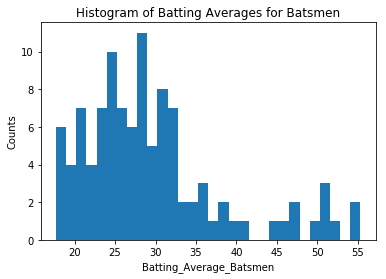

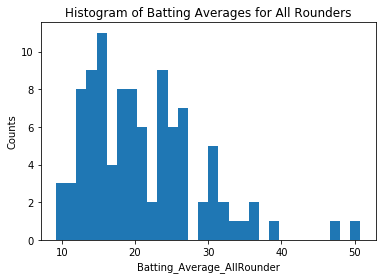

In [28]:
plt.hist(Batsmen_data['Batting_Average_Bat'],density=False, bins=30, label="Data")
plt.xlabel("Batting_Average_Batsmen")
plt.title("Histogram of Batting Averages for Batsmen")
plt.ylabel("Counts")
plt.show()

plt.hist(AllRounder_data['Batting_Average_AllRounder'],density=False, bins=30, label="Data")
plt.xlabel("Batting_Average_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Batting Averages for All Rounders")
plt.show()

Observation: Batting Averages for Batsmen and AllRounders are Right Skewed

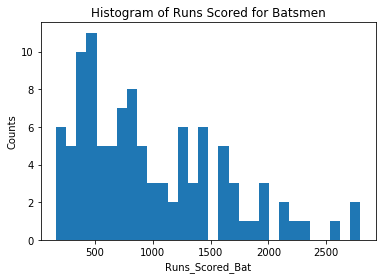

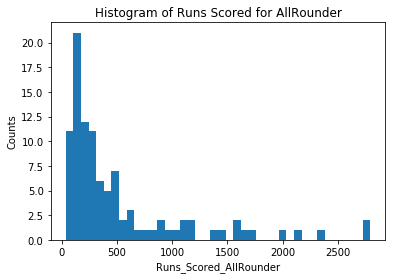

In [29]:
plt.hist(Batsmen_data['Runs_Scored_Bat'],density=False, bins=30, label="Data")
plt.xlabel("Runs_Scored_Bat")
plt.ylabel("Counts")
plt.title("Histogram of Runs Scored for Batsmen")
plt.show()

plt.hist(AllRounder_data['Runs_Scored_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Runs_Scored_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Runs Scored for AllRounder")
plt.show()

Observation: Runs Scored for Batsmen and AllRounders are Right Skewed

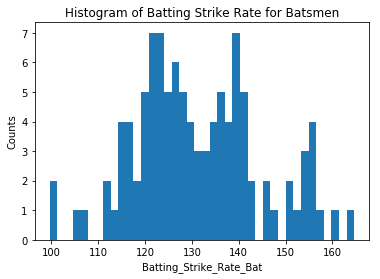

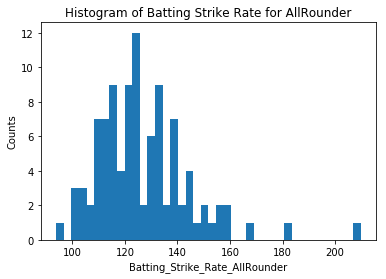

In [30]:
plt.hist(Batsmen_data['Batting_Strike_Rate_Bat'],density=False, bins=40, label="Data")
plt.xlabel("Batting_Strike_Rate_Bat")
plt.ylabel("Counts")
plt.title("Histogram of Batting Strike Rate for Batsmen")
plt.show()

plt.hist(AllRounder_data['Batting_Strike_Rate_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Batting_Strike_Rate_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Batting Strike Rate for AllRounder")
plt.show()

Observation: Batting Strike rate for Batsmen and AllRounders are approximately normally distributed

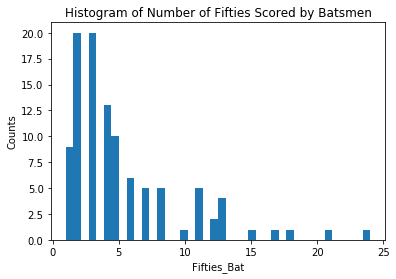

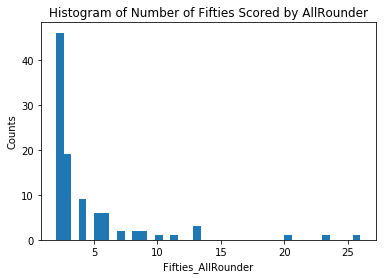

In [31]:
plt.hist(Batsmen_data['Fifties_Bat'],density=False, bins=40, label="Data")
plt.xlabel("Fifties_Bat")
plt.ylabel("Counts")
plt.title("Histogram of Number of Fifties Scored by Batsmen")
plt.show()

plt.hist(AllRounder_data['Fifties_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Fifties_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Number of Fifties Scored by AllRounder")
plt.show()

Observation: Number of Fifties Scored by Batsmen and AllRounders are Right Skewed

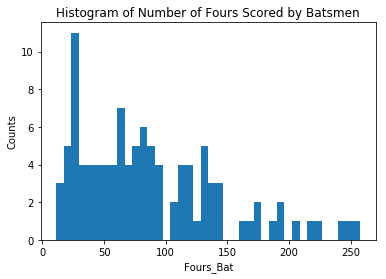

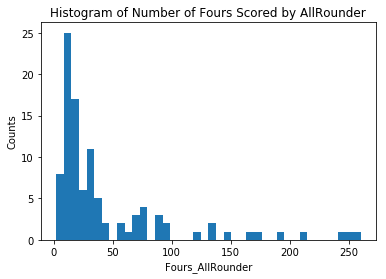

In [32]:
plt.hist(Batsmen_data['Fours_Bat'],density=False, bins=40, label="Data")
plt.xlabel("Fours_Bat")
plt.ylabel("Counts")
plt.title("Histogram of Number of Fours Scored by Batsmen")
plt.show()

plt.hist(AllRounder_data['Fours_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Fours_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Number of Fours Scored by AllRounder")
plt.show()

Observation: Number of Fours Scored by Batsmen and AllRounders are Right Skewed

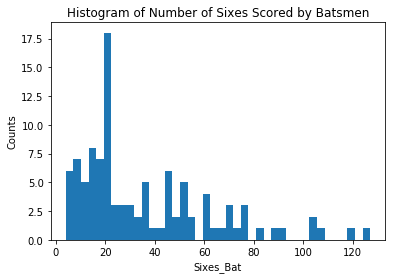

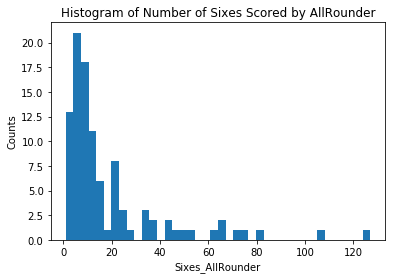

In [33]:
plt.hist(Batsmen_data['Sixes_Bat'],density=False, bins=40, label="Data")
plt.xlabel("Sixes_Bat")
plt.ylabel("Counts")
plt.title("Histogram of Number of Sixes Scored by Batsmen")
plt.show()

plt.hist(AllRounder_data['Sixes_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Sixes_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Number of Sixes Scored by AllRounder")
plt.show()

Observation: Number of Sixes Scored by Batsmen and AllRounders are Right Skewed

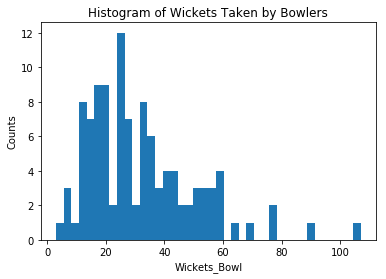

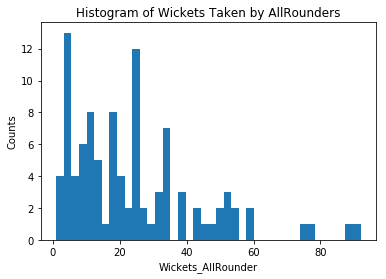

In [34]:
plt.hist(Bowler_data['Wickets_Bowl'],density=False, bins=40, label="Data")
plt.xlabel("Wickets_Bowl")
plt.ylabel("Counts")
plt.title("Histogram of Wickets Taken by Bowlers")
plt.show()

plt.hist(AllRounder_data['Wickets_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Wickets_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Wickets Taken by AllRounders")
plt.show()

Observation: Number of Wickets Taken by Bowlers and AllRounders are Right Skewed

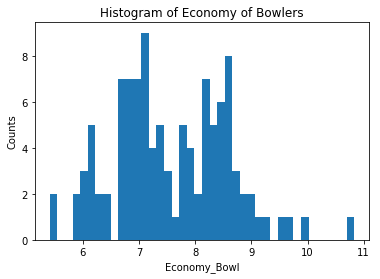

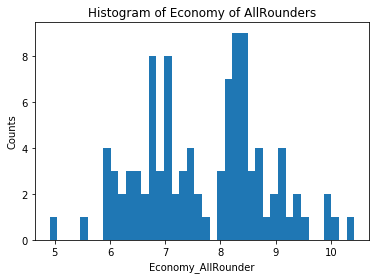

In [35]:
plt.hist(Bowler_data['Economy_Bowl'],density=False, bins=40, label="Data")
plt.xlabel("Economy_Bowl")
plt.ylabel("Counts")
plt.title("Histogram of Economy of Bowlers")
plt.show()

plt.hist(AllRounder_data['Economy_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Economy_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Economy of AllRounders")
plt.show()

Observation: Economy of Bowlers and AllRounders are approximately normally distributed

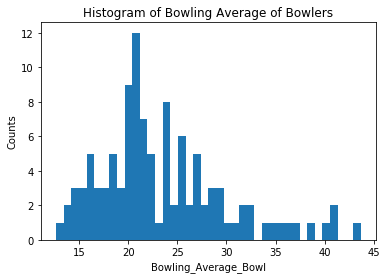

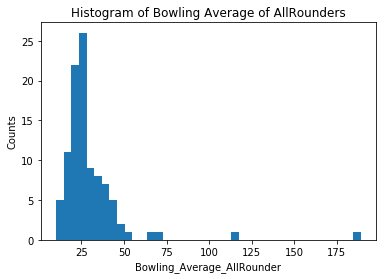

In [36]:
plt.hist(Bowler_data['Bowling_Average_Bowl'],density=False, bins=40, label="Data")
plt.xlabel("Bowling_Average_Bowl")
plt.ylabel("Counts")
plt.title("Histogram of Bowling Average of Bowlers")
plt.show()

plt.hist(AllRounder_data['Bowling_Average_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Bowling_Average_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Bowling Average of AllRounders")
plt.show()

Observation: Bowling Average of Bowlers is approximately normally distributed whereas the Bowling Average of AllRounders is Right Skewed

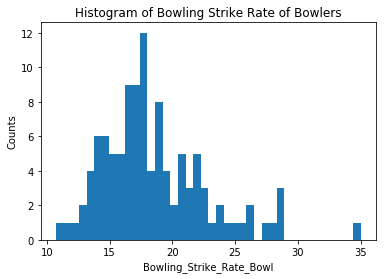

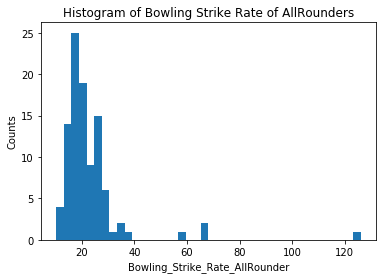

In [37]:
plt.hist(Bowler_data['Bowling_Strike_Rate_Bowl'],density=False, bins=40, label="Data")
plt.xlabel("Bowling_Strike_Rate_Bowl")
plt.ylabel("Counts")
plt.title("Histogram of Bowling Strike Rate of Bowlers")
plt.show()

plt.hist(AllRounder_data['Bowling_Strike_Rate_AllRounder'],density=False, bins=40, label="Data")
plt.xlabel("Bowling_Strike_Rate_AllRounder")
plt.ylabel("Counts")
plt.title("Histogram of Bowling Strike Rate of AllRounders")
plt.show()

Observation: Bowling Strike Rate of Bowlers is approximately normally distributed whereas the Bowling Average of AllRounders is Right Skewed

### We have skewness in the data and the models are not working properly. So, lets apply log transformation

#### Using Log Transformation

In [38]:
x = Batsmen_data.values
x_log = np.log(x)
df_log = pd.DataFrame(x_log)
df_log.columns=["a","b","c","d","e","f","g","h"]

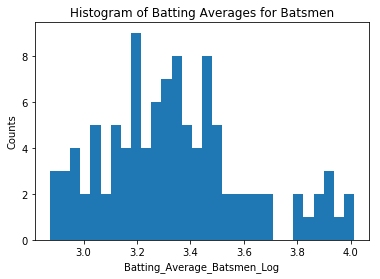

In [39]:
plt.hist(df_log["d"],density=False, bins=30, label="Data")
plt.xlabel("Batting_Average_Batsmen_Log")
plt.title("Histogram of Batting Averages for Batsmen")
plt.ylabel("Counts")
plt.show()

In [40]:
bat_avg_Batsmen=Batsmen_data['Batting_Average_Bat']
print("Skewness with Original Data:",bat_avg_Batsmen.skew())
bat_avg_Batsmen_log=df_log['d']
print("Skewness with LogTransformed Data:",bat_avg_Batsmen_log.skew())

Skewness with Original Data: 1.2361652222314674
Skewness with LogTransformed Data: 0.5901060919379084


### Skewness was greately reduced using Log Transformation. So apply Log Transformtaion to our data before building the models

In [41]:
Batsmen_data.to_csv("Batsmen_Data_After_Processing.csv",index = False)
Bowler_data.to_csv("Bowler_Data_After_Processing.csv",index=False)
AllRounder_data.to_csv("AllRounder_Data_After_Processing.csv",index=False)

## Models:

In [42]:
def sklearnSGDRegressor(Xtrn,ytrn,Xcv,ycv,epochs):
    iters=epochs
    rmse_train_SGD=[]
    rmse_cv_SGD=[]

    SGDReg_sklearn_train_table=PrettyTable()
    SGDReg_sklearn_train_table.field_names = ["Epochs","Train Error"]
    SGDReg_sklearn_cv_table=PrettyTable()
    SGDReg_sklearn_cv_table.field_names = ["Epochs","CV Error"]

    best_epoch_train_SGD_sklearn=0
    best_rmse_train_SGD_sklearn=float('inf')

    best_epoch_cv_SGD_sklearn=0
    best_rmse_cv_SGD_sklearn=float('inf')

    for i in iters:
        sgd_reg_train = SGDRegressor(shuffle = False,max_iter = i)
        sgd_reg_train.fit(Xtrn, ytrn)
        y_pred_trn_sgd_sklearn = sgd_reg_train.predict(Xtrn)
        y_pred_cv_sgd_sklearn = sgd_reg_train.predict(Xcv)
        rmse_train_SGD.append(math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_sklearn)))
        rmse_cv_SGD.append(math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_sklearn)))
        SGDReg_sklearn_train_table.add_row([i,math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_sklearn))])
        SGDReg_sklearn_cv_table.add_row([i,math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_sklearn))])
        if(math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_sklearn))<best_rmse_train_SGD_sklearn):
            best_epoch_train_SGD_sklearn=i
            best_rmse_train_SGD_sklearn=math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_sklearn))
        if(math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_sklearn))<best_rmse_cv_SGD_sklearn):
            best_epoch_cv_SGD_sklearn=i
            best_rmse_cv_SGD_sklearn=math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_sklearn))
        
    plt.plot(iters,rmse_train_SGD,label="Train RMSE")
    plt.plot(iters,rmse_cv_SGD,label="CV RMSE")
    plt.title("RMSE with epochs")
    plt.xlabel("epochs: Hyperparameter")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

    print(SGDReg_sklearn_train_table)
    print(SGDReg_sklearn_cv_table)
    print("Best No.of Epochs is:",best_epoch_cv_SGD_sklearn)
    return best_epoch_cv_SGD_sklearn

In [43]:
def SGDRegressionOwn(train_data,learning_rate,total_iter,k):
    num_iter=1
    weights=np.zeros(shape=(1,train_data.shape[1]-1))
    intercept=0
    while(num_iter<=total_iter):
        sample_data=train_data.sample(k,replace=True)
        y=np.array(sample_data['regresult'])
        x=np.array(sample_data.drop('regresult',axis=1))
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        for i in range(k):
            error=y[i]-np.dot(weights,x[i])-intercept
            w_gradient=w_gradient+(-2)*x[i]*error
            b_gradient=b_gradient+(-2)*(error)
        weights=weights-learning_rate*(w_gradient/k)
        intercept=intercept-learning_rate*(b_gradient/k)
        num_iter+=1
    
    return weights,intercept

In [44]:
def predictSGDOwn(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [45]:
def SGDRegressionOwnTraining(Xtrn,ytrn,Xcv,ycv,epochs):
    iters=[10,100,200,400,800,1600,2000]
    rmse_train_SGD_Own=[]
    rmse_cv_SGD_Own=[]
    
    train_data=pd.DataFrame(Xtrn)
    train_data['regresult']=ytrn
    
    SGDReg_own_train_table=PrettyTable()
    SGDReg_own_train_table.field_names = ["Epochs","Train Error"]
    
    SGDReg_own_cv_table=PrettyTable()
    SGDReg_own_cv_table.field_names = ["Epochs","CV Error"]

    best_epoch_train_SGD_Own=0
    best_rmse_train_SGD_Own=float('inf')

    best_epoch_cv_SGD_Own=0
    best_rmse_cv_SGD_Own=float('inf')

    for i in iters:
        w,b = SGDRegressionOwn(train_data,learning_rate=0.01,total_iter=i,k=10)
        y_pred_trn_sgd_own = predictSGDOwn(Xtrn,w,b)
        y_pred_cv_sgd_own = predictSGDOwn(Xcv,w,b)
        rmse_train_SGD_Own.append(math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_own)))
        rmse_cv_SGD_Own.append(math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_own)))
        SGDReg_own_train_table.add_row([i,math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_own))])
        SGDReg_own_cv_table.add_row([i,math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_own))])
        if(math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_own))<best_rmse_train_SGD_Own):
            best_epoch_train_SGD_Own=i
            best_rmse_train_SGD_Own=math.sqrt(mean_squared_error(ytrn,y_pred_trn_sgd_own))
        if(math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_own))<best_rmse_cv_SGD_Own):
            best_epoch_cv_SGD_Own=i
            best_rmse_cv_SGD_Own=math.sqrt(mean_squared_error(ycv,y_pred_cv_sgd_own))
    plt.plot(epochs,rmse_train_SGD_Own,label="Train RMSE")
    plt.plot(epochs,rmse_cv_SGD_Own,label="CV RMSE")
    plt.title("RMSE with epochs")
    plt.xlabel("epochs: Hyperparameter")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()
    print(SGDReg_own_train_table)
    print(SGDReg_own_cv_table)

    print("Best No.of Epochs is:",best_epoch_cv_SGD_Own)
    return best_epoch_cv_SGD_Own

In [46]:
def LinearRegressionLSM(Xtrn,ytrn,shape):
    Xtrn=np.concatenate([np.ones((Xtrn.shape[0],1),dtype=Xtrn.dtype),Xtrn], axis=1)
    transpose=Xtrn.transpose()
    prod=np.matmul(transpose,Xtrn)
    prod = prod+0.00001*np.random.rand(shape, shape)
    inverse = np.linalg.inv(prod)
    ytrn=ytrn.reshape(-1,1)
    we=np.matmul(inverse,transpose)
    we=we.dot(ytrn)
    return we

In [47]:
def predict_LSM(x,we):
    x=np.concatenate([np.ones((x.shape[0],1),dtype=x.dtype),x], axis=1)
    yhat=x.dot(we)
    return yhat

In [48]:
def sklearnKNNRegressor(Xtrn,ytrn,Xcv,ycv,neighbors):
    no_of_neighbors=neighbors
    rmse_train_KNN=[]
    rmse_cv_KNN=[]

    KNNReg_sklearn_train_table=PrettyTable()
    KNNReg_sklearn_train_table.field_names = ["Neighbors","Train Error"]

    KNNReg_sklearn_cv_table=PrettyTable()
    KNNReg_sklearn_cv_table.field_names = ["Neighbors","CV Error"]

    best_neighbors_train_KNN_sklearn=0
    best_rmse_train_KNN_sklearn=float('inf')

    best_neighbors_cv_KNN_sklearn=0
    best_rmse_cv_KNN_sklearn=float('inf')

    for i in no_of_neighbors:
        knn_reg_train = KNeighborsRegressor(n_neighbors=i)
        knn_reg_train.fit(Xtrn, ytrn)
        y_pred_trn_KNN_sklearn = knn_reg_train.predict(Xtrn)
        y_pred_cv_KNN_sklearn = knn_reg_train.predict(Xcv)
        rmse_train_KNN.append(math.sqrt(mean_squared_error(ytrn,y_pred_trn_KNN_sklearn)))
        rmse_cv_KNN.append(math.sqrt(mean_squared_error(ycv,y_pred_cv_KNN_sklearn)))
        KNNReg_sklearn_train_table.add_row([i,math.sqrt(mean_squared_error(ytrn,y_pred_trn_KNN_sklearn))])
        KNNReg_sklearn_cv_table.add_row([i,math.sqrt(mean_squared_error(ycv,y_pred_cv_KNN_sklearn))])
        if(math.sqrt(mean_squared_error(ytrn,y_pred_trn_KNN_sklearn))<best_rmse_train_KNN_sklearn):
            best_neighbors_train_KNN_sklearn=i
            best_rmse_train_KNN_sklearn=math.sqrt(mean_squared_error(ytrn,y_pred_trn_KNN_sklearn))
        if(math.sqrt(mean_squared_error(ycv,y_pred_cv_KNN_sklearn))<best_rmse_cv_KNN_sklearn):
            best_neighbors_cv_KNN_sklearn=i
            best_rmse_cv_KNN_sklearn=math.sqrt(mean_squared_error(ycv,y_pred_cv_KNN_sklearn))
    plt.plot(no_of_neighbors,rmse_train_KNN,label="Train RMSE")
    plt.plot(no_of_neighbors,rmse_cv_KNN,label="CV RMSE")
    plt.title("RMSE with Neighbors")
    plt.xlabel("Neighbors: Hyperparameter")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()
    print(KNNReg_sklearn_train_table)
    print(KNNReg_sklearn_cv_table)
    print("Best No.of Neighbors is:",best_neighbors_cv_KNN_sklearn)
    return best_neighbors_cv_KNN_sklearn

In [49]:
def euclidean_dist(x,xq):
    sum_dist=0
    dist=0
    for i in range(len(x)):
        sum_dist+=pow((x[i]-xq[i]),2)
        dist=math.sqrt(sum_dist)
    return dist

In [50]:
def KNNRegressionOwn(Xtrn,ytrn,n_neighbors,xq):
    nearest_points_indeces=[]
    distances={}
    sorted_distances={}
    Yhat=[]
    Ytrue=[]
    n=0
    for i in range(xq.shape[0]):
        for j in range(Xtrn.shape[0]):
            distances[j]=euclidean_dist(xq[i],Xtrn[j])
        sorted_distances=sorted(distances.items(), key=lambda x: x[1])
        near_points = dict(itertools.islice(dict(sorted_distances).items(), n_neighbors)) 
        for k in near_points:
            nearest_points_indeces.append(k)
        for p in range(len(nearest_points_indeces)):
            Ytrue.append(ytrn[nearest_points_indeces[p]])
        Yhat.append(sum(Ytrue)/len(Ytrue))
        nearest_points_indeces=[]
        distances={}
        Ytrue=[]
    return Yhat


In [51]:
def KNNRegressorOwnTraining(Xtrn,ytrn,Xcv,ycv,neighbors):
    no_of_neighbors=neighbors
    rmse_train_KNN_Own=[]
    rmse_cv_KNN_Own=[]

    KNNReg_own_train_table=PrettyTable()
    KNNReg_own_train_table.field_names = ["Neighbors","Train Error"]

    KNNReg_own_cv_table=PrettyTable()
    KNNReg_own_cv_table.field_names = ["Neighbors","CV Error"]

    best_neighbors_train_KNN_own=0
    best_rmse_train_KNN_own=float('inf')

    best_neighbors_cv_KNN_own=0
    best_rmse_cv_KNN_own=float('inf')

    for i in neighbors:
        y_pred_trn_knn_own = KNNRegressionOwn(Xtrn,ytrn,i,Xtrn)
        y_pred_cv_knn_own = KNNRegressionOwn(Xtrn,ytrn,i,Xcv)
 
        rmse_train_KNN_Own.append(math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_own)))
        rmse_cv_KNN_Own.append(math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_own)))

        KNNReg_own_train_table.add_row([i,math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_own))])
        KNNReg_own_cv_table.add_row([i,math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_own))])
    
        if(math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_own))<best_rmse_train_KNN_own):
            best_neighbors_train_KNN_own=i
            best_rmse_train_KNN_own=math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_own))
        if(math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_own))<best_rmse_cv_KNN_own):
            best_neighbors_cv_KNN_own=i
            best_rmse_cv_KNN_own=math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_own))
    plt.plot(neighbors,rmse_train_KNN_Own,label="Train RMSE")
    plt.plot(neighbors,rmse_cv_KNN_Own,label="CV RMSE")
    plt.title("RMSE with Neighbors")
    plt.xlabel("Neighbors: Hyperparameter")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()
    print(KNNReg_own_train_table)
    print(KNNReg_own_cv_table)
    print("Best No.of Neighbors is:",best_neighbors_cv_KNN_own)
    return best_neighbors_cv_KNN_own

In [52]:
def KNNRegressionOwnWeighted(Xtrn,ytrn,n_neighbors,xq):
    nearest_points_indeces=[]
    distances={}
    sorted_distances={}
    Yhat=[]
    Ytrue=[]
    weights=[]
    sum_weights=0
    pred=0
    n=0
    for i in range(xq.shape[0]):
        for j in range(Xtrn.shape[0]):
            distances[j]=euclidean_dist(xq[i],Xtrn[j])
        sorted_distances=sorted(distances.items(), key=lambda x: x[1])
        near_points = dict(itertools.islice(dict(sorted_distances).items(), n_neighbors)) 
        for k,v in near_points.items():
            nearest_points_indeces.append(k)
            weights.append(1/((v*v)+0.0001))
        for p in range(len(nearest_points_indeces)):
            Ytrue.append(ytrn[nearest_points_indeces[p]])
        for s in range(len(Ytrue)):
            pred+=Ytrue[s]*weights[s]
        sum_weights=sum(weights)    
        Yhat.append(pred/sum_weights)
        nearest_points_indeces=[]
        distances={}
        Ytrue=[]
        weights=[]
        sum_weights=0
        pred=0
    return Yhat


In [53]:
def KNNRegressionOwnWeightedTraining(Xtrn,ytrn,Xcv,ycv,neighbors):
    no_of_neighbors=neighbors
    rmse_train_KNN_Weighted_Own=[]
    rmse_cv_KNN_Weighted_Own=[]

    KNN_Weighted_own_train_table=PrettyTable()
    KNN_Weighted_own_train_table.field_names = ["Neighbors","Train Error"]

    KNN_Weighted_own_cv_table=PrettyTable()
    KNN_Weighted_own_cv_table.field_names = ["Neighbors","CV Error"]

    best_neighbors_train_KNN_Weighted_own=0
    best_neighbors_cv_KNN_Weighted_own=0

    best_rmse_train_KNN_Weighted_own=float('inf')
    best_rmse_cv_KNN_Weighted_own=float('inf')

    for i in no_of_neighbors:
        y_pred_trn_knn_weighted_own = KNNRegressionOwnWeighted(Xtrn,ytrn,i,Xtrn)
        y_pred_cv_knn_weighted_own = KNNRegressionOwnWeighted(Xtrn,ytrn,i,Xcv)
 
        rmse_train_KNN_Weighted_Own.append(math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_weighted_own)))
        rmse_cv_KNN_Weighted_Own.append(math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_weighted_own)))
    
        KNN_Weighted_own_train_table.add_row([i,math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_weighted_own))])
        KNN_Weighted_own_cv_table.add_row([i,math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_weighted_own))])
    
        if(math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_weighted_own))<best_rmse_train_KNN_Weighted_own):
            best_neighbors_train_KNN_Weighted_own=i
            best_rmse_train_KNN_Weighted_own=math.sqrt(mean_squared_error(ytrn,y_pred_trn_knn_weighted_own))
        if(math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_weighted_own))<best_rmse_cv_KNN_Weighted_own):
            best_neighbors_cv_KNN_Weighted_own=i
            best_rmse_cv_KNN_Weighted_own=math.sqrt(mean_squared_error(ycv,y_pred_cv_knn_weighted_own))

    plt.plot(neighbors,rmse_train_KNN_Weighted_Own,label="Train RMSE")
    plt.plot(neighbors,rmse_cv_KNN_Weighted_Own,label="CV RMSE")
    plt.title("RMSE with Neighbors")
    plt.xlabel("Neighbors: Hyperparameter")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()
    print(KNN_Weighted_own_train_table)
    print(KNN_Weighted_own_cv_table)
    print("Best No.of Neighbors is:",best_neighbors_cv_KNN_Weighted_own)
    return best_neighbors_cv_KNN_Weighted_own

### Executing the above defined models by passing data to them

### Batsmen Data

In [54]:
from sklearn.utils import resample

M_trn = np.genfromtxt('./Batsmen_Data_After_Processing.csv', missing_values=0, skip_header=1, delimiter=',', dtype=float)

ytrn_Bat = M_trn[:, 0]
Xtrn_Bat = M_trn[:, 1:8]

Xtrn_Bat, Xtst_Bat, ytrn_Bat, ytst_Bat = train_test_split(Xtrn_Bat, ytrn_Bat, test_size=0.1)
Xtrn_Bat, Xcv_Bat, ytrn_Bat, ycv_Bat = train_test_split(Xtrn_Bat, ytrn_Bat, test_size=0.1) 
 

print("Shape of Xtrn_Bat is",Xtrn_Bat.shape)
print("Shape of ytrn_Bat is",ytrn_Bat.shape)
print("Shape of Xcv_Bat is",Xcv_Bat.shape)
print("Shape of ycv_Bat is",ycv_Bat.shape)
print("Shape of Xtst_Bat is",Xtst_Bat.shape)
print("Shape of ytst_Bat is",ytst_Bat.shape)

#Using the Data without sampling for KNN as KNN is sensitive to duplicates

Xtrn_Bat_KNN=Xtrn_Bat
Xcv_Bat_KNN=Xcv_Bat
Xtst_Bat_KNN=Xtst_Bat
ytrn_Bat_KNN=ytrn_Bat
ycv_Bat_KNN=ycv_Bat
ytst_Bat_KNN=ytst_Bat

Shape of Xtrn_Bat is (84, 7)
Shape of ytrn_Bat is (84,)
Shape of Xcv_Bat is (10, 7)
Shape of ycv_Bat is (10,)
Shape of Xtst_Bat is (11, 7)
Shape of ytst_Bat is (11,)


### Sampling the Train Data separately to make sure that there is no data leake to the Test set with Replacement to generate samples as the datasize is small.

In [55]:
Xtrndf=pd.DataFrame(Xtrn_Bat)
ytrndf=pd.DataFrame(ytrn_Bat)
Train_Data = pd.concat([ytrndf,Xtrndf], axis=1)
Train_Data_upsampled = resample(Train_Data,replace=True,n_samples=50)
Xtrn_Bat_upsampled=Train_Data_upsampled.iloc[:,1:8].values
Ytrn_Bat_upsampled=Train_Data_upsampled.iloc[:,0].values
Xtrnfinal=np.concatenate((Xtrn_Bat, Xtrn_Bat_upsampled), axis=0)
ytrnfinal=np.concatenate((ytrn_Bat, Ytrn_Bat_upsampled), axis=0)

### Sampling the CV Data

In [56]:
Xcvdf=pd.DataFrame(Xcv_Bat)
ycvdf=pd.DataFrame(ycv_Bat)
CV_Data = pd.concat([ycvdf,Xcvdf], axis=1)
CV_Data_upsampled = resample(CV_Data,replace=True,n_samples=30)
Xcv_Bat_upsampled=CV_Data_upsampled.iloc[:,1:8].values
Ycv_Bat_upsampled=CV_Data_upsampled.iloc[:,0].values
Xcvfinal=np.concatenate((Xcv_Bat, Xcv_Bat_upsampled), axis=0)
ycvfinal=np.concatenate((ycv_Bat, Ycv_Bat_upsampled), axis=0)

### Sampling the Test Data

In [57]:
Xtestdf=pd.DataFrame(Xtst_Bat)
ytestdf=pd.DataFrame(ytst_Bat)
Test_Data = pd.concat([ytestdf,Xtestdf], axis=1)
Test_Data_upsampled = resample(Test_Data,replace=True,n_samples=15)
Xtest_Bat_upsampled=Test_Data_upsampled.iloc[:,1:8].values
Ytest_Bat_upsampled=Test_Data_upsampled.iloc[:,0].values
Xtestfinal=np.concatenate((Xtst_Bat, Xtest_Bat_upsampled), axis=0)
ytestfinal=np.concatenate((ytst_Bat, Ytest_Bat_upsampled), axis=0)

### Applying the Log to the Data to make it as normal distribution and then standardizing it

In [58]:
Xtrn_Bat=Xtrnfinal
Xcv_Bat=Xcvfinal
Xtst_Bat=Xtestfinal
ytrn_Bat=ytrnfinal
ycv_Bat=ycvfinal
ytst_Bat=ytestfinal

print("Shape of Xtrn_Bat after upsampling is",Xtrn_Bat.shape)
print("Shape of ytrn_Bat after upsampling is",ytrn_Bat.shape)
print("Shape of Xcv_Bat after upsampling is",Xcv_Bat.shape)
print("Shape of ycv_Bat after upsampling is",ycv_Bat.shape)
print("Shape of Xtst_Bat after upsampling is",Xtst_Bat.shape)
print("Shape of ytst_Bat after upsampling is",ytst_Bat.shape)


Xtrn_Bat = np.log(Xtrn_Bat)
Xcv_Bat = np.log(Xcv_Bat)
Xtst_Bat = np.log(Xtst_Bat)

Stdscaler_Bat = preprocessing.StandardScaler().fit(Xtrn_Bat)
Xtrn_Bat = Stdscaler_Bat.transform(Xtrn_Bat)
Xcv_Bat = Stdscaler_Bat.transform(Xcv_Bat)
Xtst_Bat = Stdscaler_Bat.transform(Xtst_Bat)

Shape of Xtrn_Bat after upsampling is (134, 7)
Shape of ytrn_Bat after upsampling is (134,)
Shape of Xcv_Bat after upsampling is (40, 7)
Shape of ycv_Bat after upsampling is (40,)
Shape of Xtst_Bat after upsampling is (26, 7)
Shape of ytst_Bat after upsampling is (26,)


### SGD SKlearn

C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-p

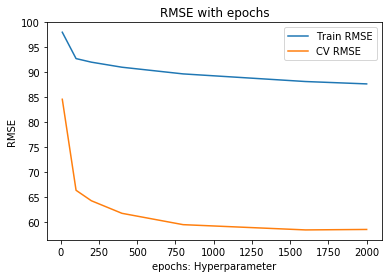

+--------+-------------------+
| Epochs |    Train Error    |
+--------+-------------------+
|   10   |  98.0194017297569 |
|  100   | 92.73724360402329 |
|  200   | 92.02215478899092 |
|  400   | 91.00795687296574 |
|  800   | 89.66901038089071 |
|  1600  | 88.14092221539306 |
|  2000  | 87.66446971645316 |
+--------+-------------------+
+--------+--------------------+
| Epochs |      CV Error      |
+--------+--------------------+
|   10   | 84.58213311207626  |
|  100   | 66.33898545426977  |
|  200   |  64.2424852819115  |
|  400   | 61.72335341843648  |
|  800   | 59.449839876871664 |
|  1600  | 58.395640274069535 |
|  2000  | 58.488031499938224 |
+--------+--------------------+
Best No.of Epochs is: 1600
+--------+-------------------+
| Epochs |     Test Error    |
+--------+-------------------+
|  1600  | 80.94328985343523 |
+--------+-------------------+


C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


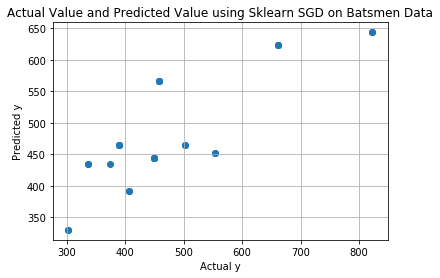

In [59]:
epochs=[10,100,200,400,800,1600,2000]
best_epoch_cv_SGD_sklearn_Bat=sklearnSGDRegressor(Xtrn_Bat,ytrn_Bat,Xcv_Bat,ycv_Bat,epochs)

rmse_test_SGD_Bat=[]
SGDReg_sklearn_test_table_Bat=PrettyTable()
SGDReg_sklearn_test_table_Bat.field_names = ["Epochs","Test Error"]

sgd_reg_test_Bat = SGDRegressor(shuffle = False,max_iter = best_epoch_cv_SGD_sklearn_Bat)
sgd_reg_test_Bat.fit(Xtrn_Bat, ytrn_Bat)
y_pred_tst_sgd_sklearn_Bat = sgd_reg_test_Bat.predict(Xtst_Bat)
rmse_test_SGD_Bat.append(math.sqrt(mean_squared_error(ytst_Bat,y_pred_tst_sgd_sklearn_Bat)))
SGDReg_sklearn_test_table_Bat.add_row([best_epoch_cv_SGD_sklearn_Bat,math.sqrt(mean_squared_error(ytst_Bat,y_pred_tst_sgd_sklearn_Bat))])
print(SGDReg_sklearn_test_table_Bat)

plt.scatter(ytst_Bat,y_pred_tst_sgd_sklearn_Bat)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Sklearn SGD on Batsmen Data')
plt.show()

### SGD Own

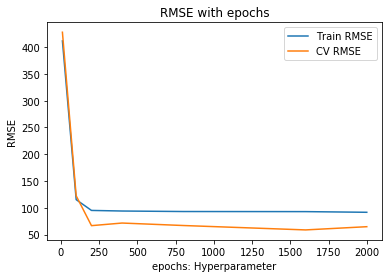

+--------+--------------------+
| Epochs |    Train Error     |
+--------+--------------------+
|   10   | 411.62355942531906 |
|  100   | 115.27515423357444 |
|  200   | 95.13363236827502  |
|  400   |  94.024414509245   |
|  800   | 93.08670046781157  |
|  1600  | 92.90392072580916  |
|  2000  |  91.6594442483909  |
+--------+--------------------+
+--------+--------------------+
| Epochs |      CV Error      |
+--------+--------------------+
|   10   | 427.8323976314829  |
|  100   | 122.38744016541315 |
|  200   | 66.71318778290183  |
|  400   | 71.57818459174152  |
|  800   | 66.96872870880156  |
|  1600  | 58.74311001316314  |
|  2000  | 64.75494755144669  |
+--------+--------------------+
Best No.of Epochs is: 1600
+--------+-------------------+
| Epochs |     Test Error    |
+--------+-------------------+
|  1600  | 85.52232289517272 |
+--------+-------------------+


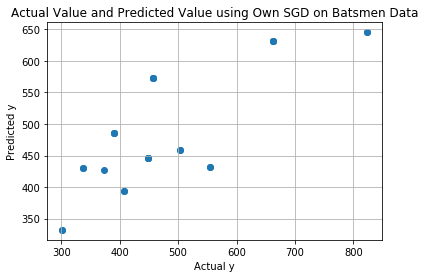

In [60]:
train_data_Bat=pd.DataFrame(Xtrn_Bat)
train_data_Bat['regresult']=ytrn_Bat
epochs=[10,100,200,400,800,1600,2000]

rmse_test_SGD_Own_Bat=[]
SGDReg_own_test_table_Bat=PrettyTable()
SGDReg_own_test_table_Bat.field_names = ["Epochs","Test Error"]

best_epoch_cv_SGD_Own_Bat=SGDRegressionOwnTraining(Xtrn_Bat,ytrn_Bat,Xcv_Bat,ycv_Bat,epochs)

w_Bat,b_Bat = SGDRegressionOwn(train_data_Bat,learning_rate=0.01,total_iter=best_epoch_cv_SGD_Own_Bat,k=10)
y_pred_tst_sgd_own_Bat = predictSGDOwn(Xtst_Bat,w_Bat,b_Bat)
rmse_test_SGD_Own_Bat.append(math.sqrt(mean_squared_error(ytst_Bat,y_pred_tst_sgd_own_Bat)))
SGDReg_own_test_table_Bat.add_row([best_epoch_cv_SGD_Own_Bat,math.sqrt(mean_squared_error(ytst_Bat,y_pred_tst_sgd_own_Bat))])
print(SGDReg_own_test_table_Bat)

plt.scatter(ytst_Bat,y_pred_tst_sgd_own_Bat)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own SGD on Batsmen Data')
plt.show()

### LSE Own

RMSE using Least Squares Estimates is 79.61337585254434


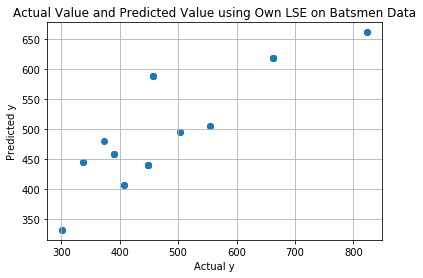

In [61]:
shape=Xtrn_Bat.shape[1]+1
we_Bat=LinearRegressionLSM(Xtrn_Bat,ytrn_Bat,shape)
y_pred_lse_own_Bat=predict_LSM(Xtst_Bat,we_Bat)
rmse_train_LSE_Own_Bat=math.sqrt(mean_squared_error(ytst_Bat,y_pred_lse_own_Bat))
print("RMSE using Least Squares Estimates is",rmse_train_LSE_Own_Bat)


plt.scatter(ytst_Bat,y_pred_lse_own_Bat)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own LSE on Batsmen Data')
plt.show()

### KNN Sklearn

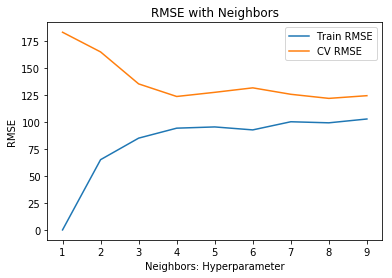

+-----------+--------------------+
| Neighbors |    Train Error     |
+-----------+--------------------+
|     1     |        0.0         |
|     2     | 65.24984035740368  |
|     3     | 85.24025336453896  |
|     4     | 94.50028344628693  |
|     5     | 95.65008899007636  |
|     6     |  92.890832055129   |
|     7     | 100.46226126164835 |
|     8     | 99.46770440072497  |
|     9     | 103.02027733714363 |
+-----------+--------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 183.59330053136472 |
|     2     | 165.31061671895122 |
|     3     | 135.63074872609087 |
|     4     | 123.93344988339508 |
|     5     | 127.79089169420489 |
|     6     | 131.94855900017333 |
|     7     | 125.9662653252846  |
|     8     | 122.16115125112402 |
|     9     | 124.6705782709768  |
+-----------+--------------------+
Best No.of Neighbors is: 8
+-----------+--------------------+
| Neighbors |     Test Error

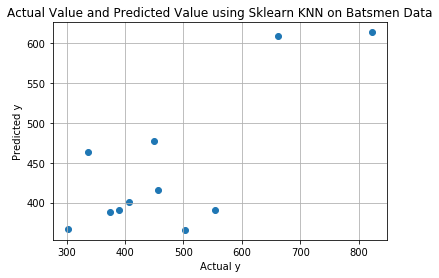

In [62]:
rmse_test_KNN_Bat=[]
KNNReg_sklearn_test_table_Bat=PrettyTable()
KNNReg_sklearn_test_table_Bat.field_names = ["Neighbors","Test Error"]
neighbors=[1,2,3,4,5,6,7,8,9]
best_neighbors_cv_KNN_sklearn_Bat=sklearnKNNRegressor(Xtrn_Bat_KNN,ytrn_Bat_KNN,Xcv_Bat_KNN,ycv_Bat_KNN,neighbors)

knn_reg_test_Bat = KNeighborsRegressor(n_neighbors=best_neighbors_cv_KNN_sklearn_Bat)
knn_reg_test_Bat.fit(Xtrn_Bat_KNN, ytrn_Bat_KNN)
y_pred_tst_knn_sklearn_Bat = knn_reg_test_Bat.predict(Xtst_Bat_KNN)
rmse_test_KNN_Bat.append(math.sqrt(mean_squared_error(ytst_Bat_KNN,y_pred_tst_knn_sklearn_Bat)))
KNNReg_sklearn_test_table_Bat.add_row([best_neighbors_cv_KNN_sklearn_Bat,math.sqrt(mean_squared_error(ytst_Bat_KNN,y_pred_tst_knn_sklearn_Bat))])
print(KNNReg_sklearn_test_table_Bat)
plt.scatter(ytst_Bat_KNN,y_pred_tst_knn_sklearn_Bat)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Sklearn KNN on Batsmen Data')
plt.show()

### KNN Own

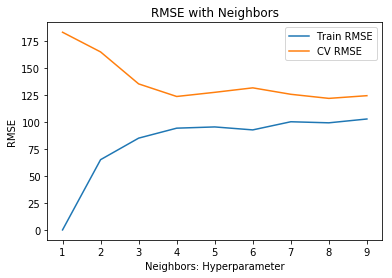

+-----------+--------------------+
| Neighbors |    Train Error     |
+-----------+--------------------+
|     1     |        0.0         |
|     2     | 65.24984035740368  |
|     3     | 85.24025336453896  |
|     4     | 94.50028344628693  |
|     5     | 95.65008899007636  |
|     6     |  92.890832055129   |
|     7     | 100.46226126164835 |
|     8     | 99.46770440072497  |
|     9     | 103.02027733714363 |
+-----------+--------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 183.59330053136472 |
|     2     | 165.31061671895122 |
|     3     | 135.63074872609087 |
|     4     | 123.93344988339508 |
|     5     | 127.79089169420489 |
|     6     | 131.94855900017333 |
|     7     | 125.9662653252846  |
|     8     | 122.16115125112402 |
|     9     | 124.6705782709768  |
+-----------+--------------------+
Best No.of Neighbors is: 8
+-----------+--------------------+
| Neighbors |     Test Error

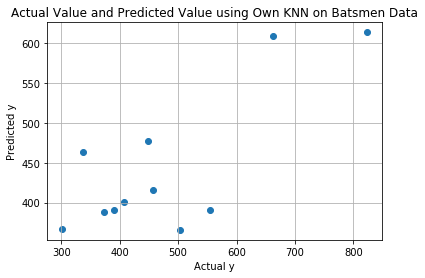

In [63]:
neighbors=[1,2,3,4,5,6,7,8,9]
KNNReg_own_test_table_Bat=PrettyTable()
KNNReg_own_test_table_Bat.field_names = ["Neighbors","Test Error"]

best_neighbors_cv_KNN_own_Bat=KNNRegressorOwnTraining(Xtrn_Bat_KNN,ytrn_Bat_KNN,Xcv_Bat_KNN,ycv_Bat_KNN,neighbors)

y_pred_knn_own_Bat=KNNRegressionOwn(Xtrn_Bat_KNN,ytrn_Bat_KNN,best_neighbors_cv_KNN_own_Bat,Xtst_Bat_KNN)
KNNReg_own_test_table_Bat.add_row([best_neighbors_cv_KNN_own_Bat,math.sqrt(mean_squared_error(ytst_Bat_KNN,y_pred_knn_own_Bat))])
print(KNNReg_own_test_table_Bat)

plt.scatter(ytst_Bat_KNN,y_pred_knn_own_Bat)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own KNN on Batsmen Data')
plt.show()

### Weighted KNN Own

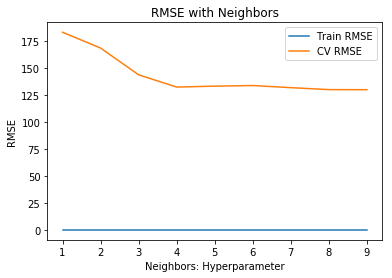

+-----------+------------------------+
| Neighbors |      Train Error       |
+-----------+------------------------+
|     1     |          0.0           |
|     2     | 1.6000472245125376e-05 |
|     3     | 2.4131531544251712e-05 |
|     4     | 2.8178311119943732e-05 |
|     5     | 3.024259134530483e-05  |
|     6     | 3.138924469296414e-05  |
|     7     | 3.354569266503812e-05  |
|     8     | 3.456098656590623e-05  |
|     9     | 3.5287898539462436e-05 |
+-----------+------------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 183.59330053136472 |
|     2     | 168.91899387729333 |
|     3     | 144.0450114338072  |
|     4     | 132.6688034399053  |
|     5     | 133.53685993405225 |
|     6     | 134.09551190002747 |
|     7     | 132.12685532896407 |
|     8     | 130.30767568195967 |
|     9     | 130.22116913396704 |
+-----------+--------------------+
Best No.of Neighbors is: 9
+----------

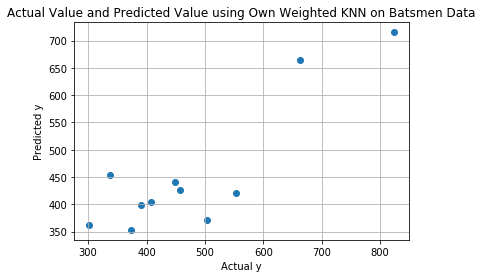

In [64]:
neighbors=[1,2,3,4,5,6,7,8,9]
KNNReg_own_weighted_test_table_Bat=PrettyTable()
KNNReg_own_weighted_test_table_Bat.field_names = ["Neighbors","Test Error"]

best_neighbors_cv_KNN_Weighted_own_Bat=KNNRegressionOwnWeightedTraining(Xtrn_Bat_KNN,ytrn_Bat_KNN,Xcv_Bat_KNN,ycv_Bat_KNN,neighbors)

y_pred_knn_own_weighted_Bat=KNNRegressionOwnWeighted(Xtrn_Bat_KNN,ytrn_Bat_KNN,best_neighbors_cv_KNN_Weighted_own_Bat,Xtst_Bat_KNN)
KNNReg_own_weighted_test_table_Bat.add_row([best_neighbors_cv_KNN_Weighted_own_Bat,math.sqrt(mean_squared_error(ytst_Bat_KNN,y_pred_knn_own_weighted_Bat))])
print(KNNReg_own_test_table_Bat)

plt.scatter(ytst_Bat_KNN,y_pred_knn_own_weighted_Bat)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own Weighted KNN on Batsmen Data')
plt.show()

### Bowler Data

In [65]:
M_trn = np.genfromtxt('./Bowler_Data_After_Processing.csv', missing_values=0, skip_header=1, delimiter=',', dtype=float)
ytrn_Bowl = M_trn[:, 0]
Xtrn_Bowl = M_trn[:, 1:6]

Xtrn_Bowl, Xtst_Bowl, ytrn_Bowl, ytst_Bowl = train_test_split(Xtrn_Bowl, ytrn_Bowl, test_size=0.2)
Xtrn_Bowl, Xcv_Bowl, ytrn_Bowl, ycv_Bowl = train_test_split(Xtrn_Bowl, ytrn_Bowl, test_size=0.1) 

print("Shape of Xtrn_Bowl is",Xtrn_Bowl.shape)
print("Shape of ytrn_Bowl is",ytrn_Bowl.shape)
print("Shape of Xcv_Bowl is",Xcv_Bowl.shape)
print("Shape of ycv_Bowl is",ycv_Bowl.shape)
print("Shape of Xtst_Bowl is",Xtst_Bowl.shape)
print("Shape of ytst_Bowl is",ytst_Bowl.shape)

#Using the Data without sampling for KNN as KNN is sensitive to duplicates

Xtrn_Bowl_KNN=Xtrn_Bowl
Xcv_Bowl_KNN=Xcv_Bowl
Xtst_Bowl_KNN=Xtst_Bowl
ytrn_Bowl_KNN=ytrn_Bowl
ycv_Bowl_KNN=ycv_Bowl
ytst_Bowl_KNN=ytst_Bowl

Shape of Xtrn_Bowl is (78, 5)
Shape of ytrn_Bowl is (78,)
Shape of Xcv_Bowl is (9, 5)
Shape of ycv_Bowl is (9,)
Shape of Xtst_Bowl is (22, 5)
Shape of ytst_Bowl is (22,)


### Sampling the Train Data separately to make sure that there is no data leake to the Test set with Replacement to generate samples as the datasize is small.

In [66]:
Xtrndf=pd.DataFrame(Xtrn_Bowl)
ytrndf=pd.DataFrame(ytrn_Bowl)
Train_Data = pd.concat([ytrndf,Xtrndf], axis=1)
Train_Data_upsampled = resample(Train_Data,replace=True,n_samples=70)
Xtrn_Bowl_upsampled=Train_Data_upsampled.iloc[:,1:6].values
Ytrn_Bowl_upsampled=Train_Data_upsampled.iloc[:,0].values
Xtrnfinal=np.concatenate((Xtrn_Bowl, Xtrn_Bowl_upsampled), axis=0)
ytrnfinal=np.concatenate((ytrn_Bowl, Ytrn_Bowl_upsampled), axis=0)

### Sampling the CV Data

In [67]:
Xcvdf=pd.DataFrame(Xcv_Bowl)
ycvdf=pd.DataFrame(ycv_Bowl)
CV_Data = pd.concat([ycvdf,Xcvdf], axis=1)
CV_Data_upsampled = resample(CV_Data,replace=True,n_samples=50)
Xcv_Bowl_upsampled=CV_Data_upsampled.iloc[:,1:6].values
Ycv_Bowl_upsampled=CV_Data_upsampled.iloc[:,0].values
Xcvfinal=np.concatenate((Xcv_Bowl, Xcv_Bowl_upsampled), axis=0)
ycvfinal=np.concatenate((ycv_Bowl, Ycv_Bowl_upsampled), axis=0)

### Sampling the Test Data

In [68]:
Xtestdf=pd.DataFrame(Xtst_Bowl)
ytestdf=pd.DataFrame(ytst_Bowl)
Test_Data = pd.concat([ytestdf,Xtestdf], axis=1)
Test_Data_upsampled = resample(Test_Data,replace=True,n_samples=35)
Xtest_Bowl_upsampled=Test_Data_upsampled.iloc[:,1:6].values
Ytest_Bowl_upsampled=Test_Data_upsampled.iloc[:,0].values
Xtestfinal=np.concatenate((Xtst_Bowl, Xtest_Bowl_upsampled), axis=0)
ytestfinal=np.concatenate((ytst_Bowl, Ytest_Bowl_upsampled), axis=0)

### Applying the Log to the Data to make it as normal distribution and then standardizing it

In [69]:
Xtrn_Bowl=Xtrnfinal
Xcv_Bowl=Xcvfinal
Xtst_Bowl=Xtestfinal
ytrn_Bowl=ytrnfinal
ycv_Bowl=ycvfinal
ytst_Bowl=ytestfinal

print("Shape of Xtrn_Bowl after upsampling is",Xtrn_Bowl.shape)
print("Shape of ytrn_Bowl after upsampling is",ytrn_Bowl.shape)
print("Shape of Xcv_Bowl after upsampling is",Xcv_Bowl.shape)
print("Shape of ycv_Bowl after upsampling is",ycv_Bowl.shape)
print("Shape of Xtst_Bowl after upsampling is",Xtst_Bowl.shape)
print("Shape of ytst_Bowl after upsampling is",ytst_Bowl.shape)


Xtrn_Bowl = np.log(Xtrn_Bowl)
Xcv_Bowl = np.log(Xcv_Bowl)
Xtst_Bowl = np.log(Xtst_Bowl)

Stdscaler_Bowl = preprocessing.StandardScaler().fit(Xtrn_Bowl)
Xtrn_Bowl = Stdscaler_Bowl.transform(Xtrn_Bowl)
Xcv_Bowl = Stdscaler_Bowl.transform(Xcv_Bowl)
Xtst_Bowl = Stdscaler_Bowl.transform(Xtst_Bowl)

Shape of Xtrn_Bowl after upsampling is (148, 5)
Shape of ytrn_Bowl after upsampling is (148,)
Shape of Xcv_Bowl after upsampling is (59, 5)
Shape of ycv_Bowl after upsampling is (59,)
Shape of Xtst_Bowl after upsampling is (57, 5)
Shape of ytst_Bowl after upsampling is (57,)


### SGD SKlearn

C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-p

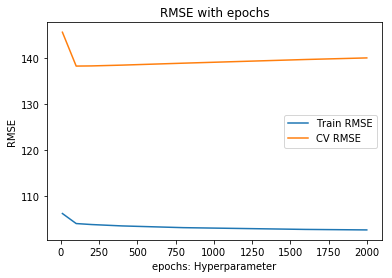

+--------+--------------------+
| Epochs |    Train Error     |
+--------+--------------------+
|   10   | 106.20683644358837 |
|  100   | 104.02617516542051 |
|  200   | 103.81135349757012 |
|  400   | 103.5095189883325  |
|  800   | 103.13302646141719 |
|  1600  | 102.74786672101149 |
|  2000  | 102.64013759310986 |
+--------+--------------------+
+--------+--------------------+
| Epochs |      CV Error      |
+--------+--------------------+
|   10   | 145.66856607428664 |
|  100   | 138.3035083221082  |
|  200   | 138.33738449577888 |
|  400   | 138.51191132989536 |
|  800   | 138.93536042423696 |
|  1600  | 139.73515184974315 |
|  2000  | 140.0802993300994  |
+--------+--------------------+
Best No.of Epochs is: 100
+--------+-------------------+
| Epochs |     Test Error    |
+--------+-------------------+
|  100   | 97.87845258759566 |
+--------+-------------------+


C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


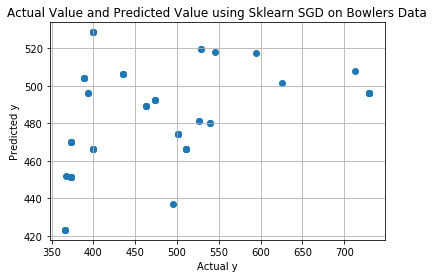

In [70]:
epochs=[10,100,200,400,800,1600,2000]
best_epoch_cv_SGD_sklearn_Bowl=sklearnSGDRegressor(Xtrn_Bowl,ytrn_Bowl,Xcv_Bowl,ycv_Bowl,epochs)

rmse_test_SGD_Bowl=[]
SGDReg_sklearn_test_table_Bowl=PrettyTable()
SGDReg_sklearn_test_table_Bowl.field_names = ["Epochs","Test Error"]

sgd_reg_test_Bowl = SGDRegressor(shuffle = False,max_iter = best_epoch_cv_SGD_sklearn_Bowl)
sgd_reg_test_Bowl.fit(Xtrn_Bowl, ytrn_Bowl)
y_pred_tst_sgd_sklearn_Bowl = sgd_reg_test_Bowl.predict(Xtst_Bowl)
rmse_test_SGD_Bowl.append(math.sqrt(mean_squared_error(ytst_Bowl,y_pred_tst_sgd_sklearn_Bowl)))
SGDReg_sklearn_test_table_Bowl.add_row([best_epoch_cv_SGD_sklearn_Bowl,math.sqrt(mean_squared_error(ytst_Bowl,y_pred_tst_sgd_sklearn_Bowl))])
print(SGDReg_sklearn_test_table_Bowl)

plt.scatter(ytst_Bowl,y_pred_tst_sgd_sklearn_Bowl)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Sklearn SGD on Bowlers Data')
plt.show()

### SGD Own

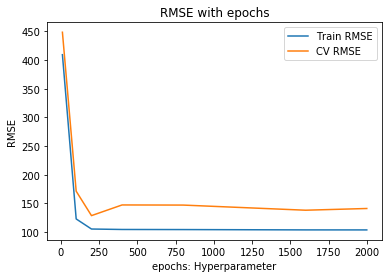

+--------+--------------------+
| Epochs |    Train Error     |
+--------+--------------------+
|   10   | 409.47499510991275 |
|  100   | 122.98562430534258 |
|  200   | 105.40096387474964 |
|  400   | 104.60794966059879 |
|  800   | 104.44626170673247 |
|  1600  | 103.88777540785044 |
|  2000  | 103.84365772381335 |
+--------+--------------------+
+--------+--------------------+
| Epochs |      CV Error      |
+--------+--------------------+
|   10   | 448.6304556719735  |
|  100   | 171.35743777189697 |
|  200   | 128.76442034290088 |
|  400   | 147.39269516962173 |
|  800   | 147.1598655238906  |
|  1600  | 138.20771494683325 |
|  2000  | 141.20497953885382 |
+--------+--------------------+
Best No.of Epochs is: 200
+--------+-------------------+
| Epochs |     Test Error    |
+--------+-------------------+
|  200   | 99.96147643854613 |
+--------+-------------------+


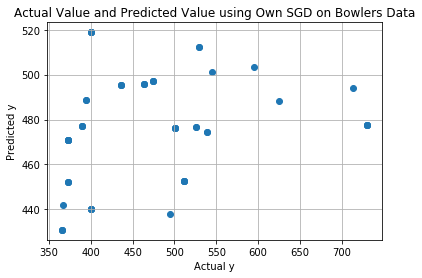

In [71]:
train_data_Bowl=pd.DataFrame(Xtrn_Bowl)
train_data_Bowl['regresult']=ytrn_Bowl
epochs=[10,100,200,400,800,1600,2000]

rmse_test_SGD_Own_Bowl=[]
SGDReg_own_test_table_Bowl=PrettyTable()
SGDReg_own_test_table_Bowl.field_names = ["Epochs","Test Error"]

best_epoch_cv_SGD_Own_Bowl=SGDRegressionOwnTraining(Xtrn_Bowl,ytrn_Bowl,Xcv_Bowl,ycv_Bowl,epochs)

w_Bowl,b_Bowl = SGDRegressionOwn(train_data_Bowl,learning_rate=0.01,total_iter=best_epoch_cv_SGD_Own_Bowl,k=10)
y_pred_tst_sgd_own_Bowl = predictSGDOwn(Xtst_Bowl,w_Bowl,b_Bowl)
rmse_test_SGD_Own_Bowl.append(math.sqrt(mean_squared_error(ytst_Bowl,y_pred_tst_sgd_own_Bowl)))
SGDReg_own_test_table_Bowl.add_row([best_epoch_cv_SGD_Own_Bowl,math.sqrt(mean_squared_error(ytst_Bowl,y_pred_tst_sgd_own_Bowl))])
print(SGDReg_own_test_table_Bowl)

plt.scatter(ytst_Bowl,y_pred_tst_sgd_own_Bowl)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own SGD on Bowlers Data')
plt.show()

### LSE Own

RMSE using Least Squares Estimates is 98.3094397459801


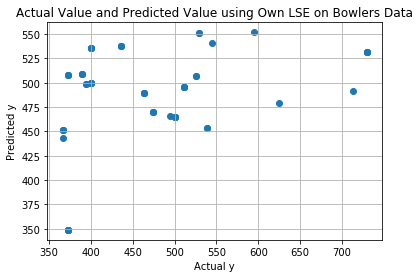

In [72]:
shape=Xtrn_Bowl.shape[1]+1
we_Bowl=LinearRegressionLSM(Xtrn_Bowl,ytrn_Bowl,shape)
y_pred_lse_own_Bowl=predict_LSM(Xtst_Bowl,we_Bowl)
rmse_train_LSE_Own_Bowl=math.sqrt(mean_squared_error(ytst_Bowl,y_pred_lse_own_Bowl))
print("RMSE using Least Squares Estimates is",rmse_train_LSE_Own_Bowl)

plt.scatter(ytst_Bowl,y_pred_lse_own_Bowl)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own LSE on Bowlers Data')
plt.show()

### KNN Sklearn

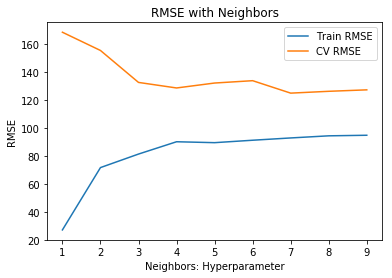

+-----------+-------------------+
| Neighbors |    Train Error    |
+-----------+-------------------+
|     1     | 27.06142111605584 |
|     2     | 71.69037324065634 |
|     3     | 81.37459546028347 |
|     4     | 90.18865110678581 |
|     5     | 89.53197681161112 |
|     6     | 91.27368170239421 |
|     7     | 92.91399780986171 |
|     8     | 94.43013756958239 |
|     9     | 94.83764721302165 |
+-----------+-------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 168.59319875566354 |
|     2     | 155.54125926368647 |
|     3     | 132.6651777321994  |
|     4     | 128.69648294426005 |
|     5     | 132.23129567373812 |
|     6     | 133.90883899315173 |
|     7     | 124.99819499830573 |
|     8     | 126.30753639431022 |
|     9     | 127.34816667528258 |
+-----------+--------------------+
Best No.of Neighbors is: 7
+-----------+--------------------+
| Neighbors |     Test Error     |
+-----

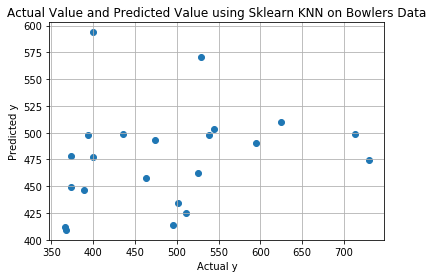

In [73]:
rmse_test_KNN_Bowl=[]
KNNReg_sklearn_test_table_Bowl=PrettyTable()
KNNReg_sklearn_test_table_Bowl.field_names = ["Neighbors","Test Error"]
neighbors=[1,2,3,4,5,6,7,8,9]
best_neighbors_cv_KNN_sklearn_Bowl=sklearnKNNRegressor(Xtrn_Bowl_KNN,ytrn_Bowl_KNN,Xcv_Bowl_KNN,ycv_Bowl_KNN,neighbors)

knn_reg_test_Bowl = KNeighborsRegressor(n_neighbors=best_neighbors_cv_KNN_sklearn_Bowl)
knn_reg_test_Bowl.fit(Xtrn_Bowl_KNN, ytrn_Bowl_KNN)
y_pred_tst_knn_sklearn_Bowl = knn_reg_test_Bowl.predict(Xtst_Bowl_KNN)
rmse_test_KNN_Bowl.append(math.sqrt(mean_squared_error(ytst_Bowl_KNN,y_pred_tst_knn_sklearn_Bowl)))
KNNReg_sklearn_test_table_Bowl.add_row([best_neighbors_cv_KNN_sklearn_Bowl,math.sqrt(mean_squared_error(ytst_Bowl_KNN,y_pred_tst_knn_sklearn_Bowl))])
print(KNNReg_sklearn_test_table_Bowl)

plt.scatter(ytst_Bowl_KNN,y_pred_tst_knn_sklearn_Bowl)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Sklearn KNN on Bowlers Data')
plt.show()

### KNN Own

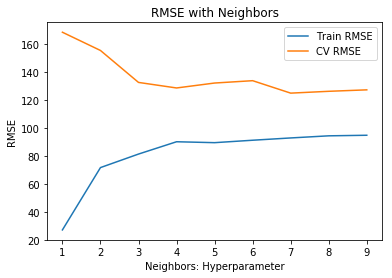

+-----------+-------------------+
| Neighbors |    Train Error    |
+-----------+-------------------+
|     1     | 27.06142111605584 |
|     2     | 71.69037324065634 |
|     3     | 81.37459546028347 |
|     4     | 90.18865110678581 |
|     5     | 89.53197681161112 |
|     6     | 91.27368170239421 |
|     7     | 92.91399780986171 |
|     8     | 94.43013756958239 |
|     9     | 94.83764721302165 |
+-----------+-------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 168.59319875566354 |
|     2     | 155.54125926368647 |
|     3     | 132.6651777321994  |
|     4     | 128.69648294426005 |
|     5     | 132.23129567373812 |
|     6     | 133.90883899315173 |
|     7     | 124.99819499830573 |
|     8     | 126.30753639431022 |
|     9     | 127.34816667528258 |
+-----------+--------------------+
Best No.of Neighbors is: 7
+-----------+--------------------+
| Neighbors |     Test Error     |
+-----

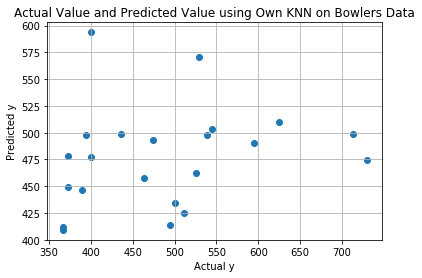

In [74]:
neighbors=[1,2,3,4,5,6,7,8,9]
best_neighbors_cv_KNN_own_Bowl=KNNRegressorOwnTraining(Xtrn_Bowl_KNN,ytrn_Bowl_KNN,Xcv_Bowl_KNN,ycv_Bowl_KNN,neighbors)

y_pred_knn_own_Bowl=KNNRegressionOwn(Xtrn_Bowl_KNN,ytrn_Bowl_KNN,best_neighbors_cv_KNN_own_Bowl,Xtst_Bowl_KNN)
KNNReg_own_test_table_Bowl=PrettyTable()
KNNReg_own_test_table_Bowl.field_names = ["Neighbors","Test Error"]
KNNReg_own_test_table_Bowl.add_row([best_neighbors_cv_KNN_own_Bowl,math.sqrt(mean_squared_error(ytst_Bowl_KNN,y_pred_knn_own_Bowl))])
print(KNNReg_own_test_table_Bowl)
plt.scatter(ytst_Bowl_KNN,y_pred_knn_own_Bowl)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own KNN on Bowlers Data')
plt.show()

### Weighted KNN Own

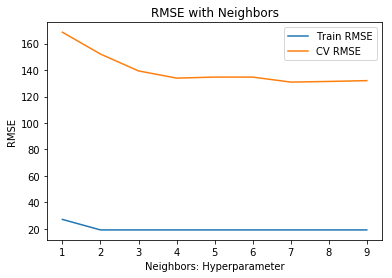

+-----------+--------------------+
| Neighbors |    Train Error     |
+-----------+--------------------+
|     1     | 27.06142111605584  |
|     2     | 19.135314620157402 |
|     3     | 19.135314660114567 |
|     4     | 19.135314703882344 |
|     5     | 19.13531474150093  |
|     6     | 19.13531478400213  |
|     7     | 19.13531481369367  |
|     8     | 19.135314841384826 |
|     9     | 19.135314860371462 |
+-----------+--------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 168.59319875566354 |
|     2     | 152.10643890116424 |
|     3     | 139.3570218860494  |
|     4     | 133.91192298314215 |
|     5     | 134.68251390091243 |
|     6     | 134.6752860863784  |
|     7     | 130.89901937535555 |
|     8     | 131.39287846533054 |
|     9     | 132.00700664337418 |
+-----------+--------------------+
Best No.of Neighbors is: 7
+-----------+--------------------+
| Neighbors |     Test Error

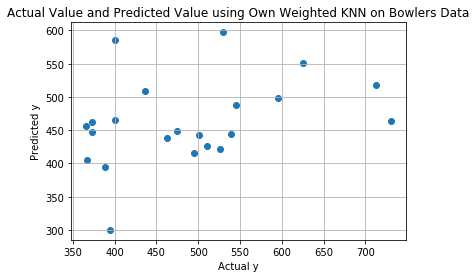

In [75]:
neighbors=[1,2,3,4,5,6,7,8,9]
KNNReg_own_weighted_test_table_Bowl=PrettyTable()
KNNReg_own_weighted_test_table_Bowl.field_names = ["Neighbors","Test Error"]

best_neighbors_cv_KNN_Weighted_own_Bowl=KNNRegressionOwnWeightedTraining(Xtrn_Bowl_KNN,ytrn_Bowl_KNN,Xcv_Bowl_KNN,ycv_Bowl_KNN,neighbors)

y_pred_knn_own_weighted_Bowl=KNNRegressionOwnWeighted(Xtrn_Bowl_KNN,ytrn_Bowl_KNN,best_neighbors_cv_KNN_Weighted_own_Bowl,Xtst_Bowl_KNN)
KNNReg_own_weighted_test_table_Bowl.add_row([best_neighbors_cv_KNN_Weighted_own_Bowl,math.sqrt(mean_squared_error(ytst_Bowl_KNN,y_pred_knn_own_weighted_Bowl))])
print(KNNReg_own_weighted_test_table_Bowl)

plt.scatter(ytst_Bowl_KNN,y_pred_knn_own_weighted_Bowl)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own Weighted KNN on Bowlers Data')
plt.show()

### AllRounder Data

In [76]:
M_trn = np.genfromtxt('./AllRounder_Data_After_Processing.csv', missing_values=0, skip_header=1, delimiter=',', dtype=float)
ytrn_All = M_trn[:, 0]
Xtrn_All = M_trn[:, 1:13]

Xtrn_All, Xtst_All, ytrn_All, ytst_All = train_test_split(Xtrn_All, ytrn_All, test_size=0.2)
Xtrn_All, Xcv_All, ytrn_All, ycv_All = train_test_split(Xtrn_All, ytrn_All, test_size=0.1) 

print("Shape of Xtrn_All is",Xtrn_All.shape)
print("Shape of ytrn_All is",ytrn_All.shape)
print("Shape of Xcv_All is",Xcv_All.shape)
print("Shape of ycv_All is",ycv_All.shape)
print("Shape of Xtst_All is",Xtst_All.shape)
print("Shape of ytst_All is",ytst_All.shape)

#Using the Data without sampling for KNN as KNN is sensitive to duplicates

Xtrn_All_KNN=Xtrn_All
Xcv_All_KNN=Xcv_All
Xtst_All_KNN=Xtst_All
ytrn_All_KNN=ytrn_All
ycv_All_KNN=ycv_All
ytst_All_KNN=ytst_All

Shape of Xtrn_All is (72, 12)
Shape of ytrn_All is (72,)
Shape of Xcv_All is (8, 12)
Shape of ycv_All is (8,)
Shape of Xtst_All is (20, 12)
Shape of ytst_All is (20,)


### Sampling the Train Data separately to make sure that there is no data leake to the Test set with Replacement to generate samples as the datasize is small.

In [77]:
Xtrndf=pd.DataFrame(Xtrn_All)
ytrndf=pd.DataFrame(ytrn_All)
Train_Data = pd.concat([ytrndf,Xtrndf], axis=1)
Train_Data_upsampled = resample(Train_Data,replace=True,n_samples=50)
Xtrn_All_upsampled=Train_Data_upsampled.iloc[:,1:13].values
Ytrn_All_upsampled=Train_Data_upsampled.iloc[:,0].values
Xtrnfinal=np.concatenate((Xtrn_All, Xtrn_All_upsampled), axis=0)
ytrnfinal=np.concatenate((ytrn_All, Ytrn_All_upsampled), axis=0)

### Sampling the CV Data

In [78]:
Xcvdf=pd.DataFrame(Xcv_All)
ycvdf=pd.DataFrame(ycv_All)
CV_Data = pd.concat([ycvdf,Xcvdf], axis=1)
CV_Data_upsampled = resample(CV_Data,replace=True,n_samples=30)
Xcv_All_upsampled=CV_Data_upsampled.iloc[:,1:13].values
Ycv_All_upsampled=CV_Data_upsampled.iloc[:,0].values
Xcvfinal=np.concatenate((Xcv_All, Xcv_All_upsampled), axis=0)
ycvfinal=np.concatenate((ycv_All, Ycv_All_upsampled), axis=0)

### Sampling the Test Data

In [79]:
Xtestdf=pd.DataFrame(Xtst_All)
ytestdf=pd.DataFrame(ytst_All)
Test_Data = pd.concat([ytestdf,Xtestdf], axis=1)
Test_Data_upsampled = resample(Test_Data,replace=True,n_samples=15)
Xtest_All_upsampled=Test_Data_upsampled.iloc[:,1:13].values
Ytest_All_upsampled=Test_Data_upsampled.iloc[:,0].values
Xtestfinal=np.concatenate((Xtst_All, Xtest_All_upsampled), axis=0)
ytestfinal=np.concatenate((ytst_All, Ytest_All_upsampled), axis=0)

### Applying the Log to the Data to make it as normal distribution and then standardizing it

In [80]:
Xtrn_All=Xtrnfinal
Xcv_All=Xcvfinal
Xtst_All=Xtestfinal
ytrn_All=ytrnfinal
ycv_All=ycvfinal
ytst_All=ytestfinal

print("Shape of Xtrn_All after upsampling is",Xtrn_All.shape)
print("Shape of ytrn_All after upsampling is",ytrn_All.shape)
print("Shape of Xcv_All after upsampling is",Xcv_All.shape)
print("Shape of ycv_All after upsampling is",ycv_All.shape)
print("Shape of Xtst_All after upsampling is",Xtst_All.shape)
print("Shape of ytst_All after upsampling is",ytst_All.shape)


Xtrn_All = np.log(Xtrn_All)
Xcv_All = np.log(Xcv_All)
Xtst_All = np.log(Xtst_All)

Stdscaler_All = preprocessing.StandardScaler().fit(Xtrn_All)
Xtrn_All = Stdscaler_All.transform(Xtrn_All)
Xcv_All = Stdscaler_All.transform(Xcv_All)
Xtst_All = Stdscaler_All.transform(Xtst_All)

Shape of Xtrn_All after upsampling is (122, 12)
Shape of ytrn_All after upsampling is (122,)
Shape of Xcv_All after upsampling is (38, 12)
Shape of ycv_All after upsampling is (38,)
Shape of Xtst_All after upsampling is (35, 12)
Shape of ytst_All after upsampling is (35,)


### SGD SKlearn

C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Kalyan\Anaconda3\lib\site-p

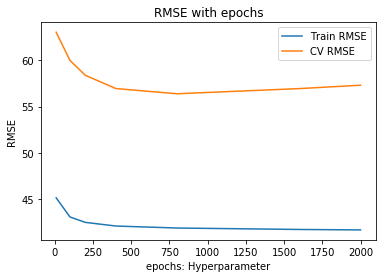

+--------+--------------------+
| Epochs |    Train Error     |
+--------+--------------------+
|   10   | 45.130376231385014 |
|  100   | 43.05760938909394  |
|  200   | 42.47368457470476  |
|  400   |  42.0774681522014  |
|  800   | 41.861634855038005 |
|  1600  | 41.70491110226381  |
|  2000  |  41.6564969910735  |
+--------+--------------------+
+--------+--------------------+
| Epochs |      CV Error      |
+--------+--------------------+
|   10   | 63.03648731537768  |
|  100   | 59.99379869889626  |
|  200   | 58.38799936216861  |
|  400   | 56.94827705368825  |
|  800   | 56.382189219844925 |
|  1600  | 56.94117325048967  |
|  2000  |  57.308000230274   |
+--------+--------------------+
Best No.of Epochs is: 800
+--------+--------------------+
| Epochs |     Test Error     |
+--------+--------------------+
|  800   | 52.956417551841525 |
+--------+--------------------+


C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


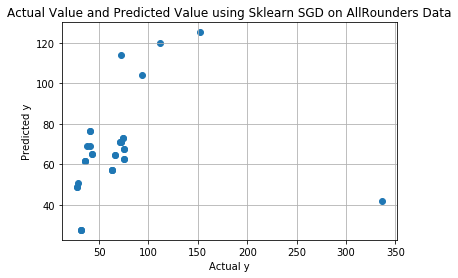

In [81]:
epochs=[10,100,200,400,800,1600,2000]
best_epoch_cv_SGD_sklearn_All=sklearnSGDRegressor(Xtrn_All,ytrn_All,Xcv_All,ycv_All,epochs)

rmse_test_SGD_All=[]
SGDReg_sklearn_test_table_All=PrettyTable()
SGDReg_sklearn_test_table_All.field_names = ["Epochs","Test Error"]

sgd_reg_test_All = SGDRegressor(shuffle = False,max_iter = best_epoch_cv_SGD_sklearn_Bowl)
sgd_reg_test_All.fit(Xtrn_All, ytrn_All)
y_pred_tst_sgd_sklearn_All = sgd_reg_test_All.predict(Xtst_All)
rmse_test_SGD_All.append(math.sqrt(mean_squared_error(ytst_All,y_pred_tst_sgd_sklearn_All)))
SGDReg_sklearn_test_table_All.add_row([best_epoch_cv_SGD_sklearn_All,math.sqrt(mean_squared_error(ytst_All,y_pred_tst_sgd_sklearn_All))])
print(SGDReg_sklearn_test_table_All)

plt.scatter(ytst_All,y_pred_tst_sgd_sklearn_All)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Sklearn SGD on AllRounders Data')
plt.show()

### SGD Own

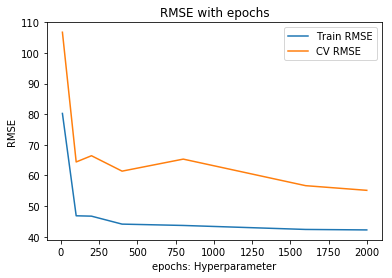

+--------+--------------------+
| Epochs |    Train Error     |
+--------+--------------------+
|   10   | 80.26618360602971  |
|  100   |  46.8372201415197  |
|  200   | 46.71640027308112  |
|  400   | 44.11642771302572  |
|  800   | 43.679792308797616 |
|  1600  |  42.375658818614   |
|  2000  | 42.22139978242118  |
+--------+--------------------+
+--------+--------------------+
| Epochs |      CV Error      |
+--------+--------------------+
|   10   | 106.79004670353771 |
|  100   | 64.42104171757784  |
|  200   | 66.45248641135728  |
|  400   | 61.41909188364906  |
|  800   | 65.34845706052704  |
|  1600  | 56.67606348839526  |
|  2000  |  55.1513821466075  |
+--------+--------------------+
Best No.of Epochs is: 2000
+--------+-------------------+
| Epochs |     Test Error    |
+--------+-------------------+
|  2000  | 51.14022020899138 |
+--------+-------------------+


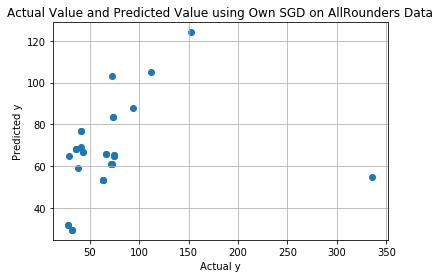

In [82]:
train_data_All=pd.DataFrame(Xtrn_All)
train_data_All['regresult']=ytrn_All
epochs=[10,100,200,400,800,1600,2000]

rmse_test_SGD_Own_All=[]
SGDReg_own_test_table_All=PrettyTable()
SGDReg_own_test_table_All.field_names = ["Epochs","Test Error"]

best_epoch_cv_SGD_Own_All=SGDRegressionOwnTraining(Xtrn_All,ytrn_All,Xcv_All,ycv_All,epochs)

w_All,b_All = SGDRegressionOwn(train_data_All,learning_rate=0.01,total_iter=best_epoch_cv_SGD_Own_All,k=10)
y_pred_tst_sgd_own_All = predictSGDOwn(Xtst_All,w_All,b_All)
rmse_test_SGD_Own_All.append(math.sqrt(mean_squared_error(ytst_All,y_pred_tst_sgd_own_All)))
SGDReg_own_test_table_All.add_row([best_epoch_cv_SGD_Own_All,math.sqrt(mean_squared_error(ytst_All,y_pred_tst_sgd_own_All))])
print(SGDReg_own_test_table_All)

plt.scatter(ytst_All,y_pred_tst_sgd_own_All)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own SGD on AllRounders Data')
plt.show()

### LSE Own

RMSE using Least Squares Estimates is 58.744494933346196


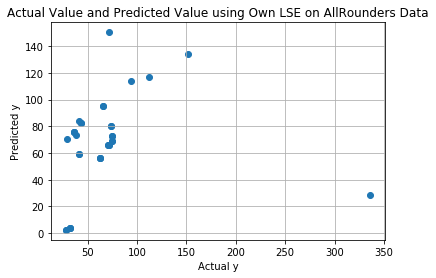

In [83]:
shape=Xtrn_All.shape[1]+1
we_All=LinearRegressionLSM(Xtrn_All,ytrn_All,shape)
y_pred_lse_own_All=predict_LSM(Xtst_All,we_All)
rmse_train_LSE_Own_All=math.sqrt(mean_squared_error(ytst_All,y_pred_lse_own_All))
print("RMSE using Least Squares Estimates is",rmse_train_LSE_Own_All)

plt.scatter(ytst_All,y_pred_lse_own_All)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own LSE on AllRounders Data')
plt.show()

### KNN Sklearn

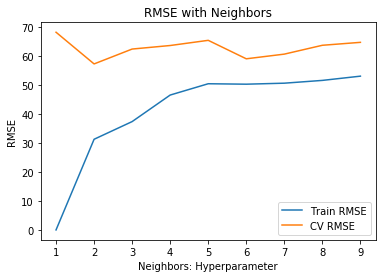

+-----------+--------------------+
| Neighbors |    Train Error     |
+-----------+--------------------+
|     1     |        0.0         |
|     2     | 31.262164299143887 |
|     3     | 37.35913873356264  |
|     4     | 46.51170327634397  |
|     5     | 50.40889471776451  |
|     6     | 50.255615895264334 |
|     7     | 50.601215333203996 |
|     8     | 51.562388467892845 |
|     9     | 53.025485952453344 |
+-----------+--------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 68.16890786861705  |
|     2     | 57.243449406897206 |
|     3     | 62.37287070513911  |
|     4     | 63.59343519578102  |
|     5     |  65.3787809614098  |
|     6     | 59.01156313243476  |
|     7     | 60.623082759500996 |
|     8     |  63.6732841101745  |
|     9     | 64.68562389180153  |
+-----------+--------------------+
Best No.of Neighbors is: 2
+-----------+-------------------+
| Neighbors |     Test Error 

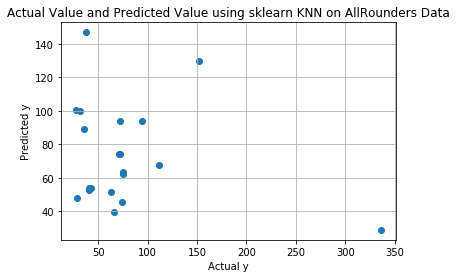

In [84]:
rmse_test_KNN_All=[]
KNNReg_sklearn_test_table_All=PrettyTable()
KNNReg_sklearn_test_table_All.field_names = ["Neighbors","Test Error"]
neighbors=[1,2,3,4,5,6,7,8,9]
best_neighbors_cv_KNN_sklearn_All=sklearnKNNRegressor(Xtrn_All_KNN,ytrn_All_KNN,Xcv_All_KNN,ycv_All_KNN,neighbors)

knn_reg_test_All = KNeighborsRegressor(n_neighbors=best_neighbors_cv_KNN_sklearn_All)
knn_reg_test_All.fit(Xtrn_All_KNN, ytrn_All_KNN)
y_pred_tst_knn_sklearn_All = knn_reg_test_All.predict(Xtst_All_KNN)
rmse_test_KNN_All.append(math.sqrt(mean_squared_error(ytst_All_KNN,y_pred_tst_knn_sklearn_All)))
KNNReg_sklearn_test_table_All.add_row([best_neighbors_cv_KNN_sklearn_All,math.sqrt(mean_squared_error(ytst_All_KNN,y_pred_tst_knn_sklearn_All))])
print(KNNReg_sklearn_test_table_All)

plt.scatter(ytst_All_KNN,y_pred_tst_knn_sklearn_All)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using sklearn KNN on AllRounders Data')
plt.show()

### KNN Own

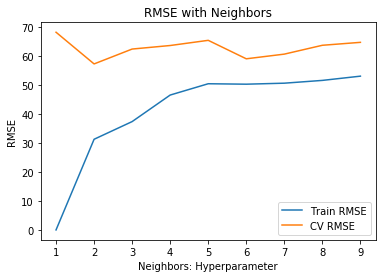

+-----------+--------------------+
| Neighbors |    Train Error     |
+-----------+--------------------+
|     1     |        0.0         |
|     2     | 31.262164299143887 |
|     3     | 37.35913873356264  |
|     4     | 46.51170327634397  |
|     5     | 50.40889471776451  |
|     6     | 50.255615895264334 |
|     7     | 50.601215333203996 |
|     8     | 51.562388467892845 |
|     9     | 53.025485952453344 |
+-----------+--------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 68.16890786861705  |
|     2     | 57.243449406897206 |
|     3     | 62.37287070513911  |
|     4     | 63.59343519578102  |
|     5     |  65.3787809614098  |
|     6     | 59.01156313243476  |
|     7     | 60.623082759500996 |
|     8     |  63.6732841101745  |
|     9     | 64.68562389180153  |
+-----------+--------------------+
Best No.of Neighbors is: 2
+-----------+-------------------+
| Neighbors |     Test Error 

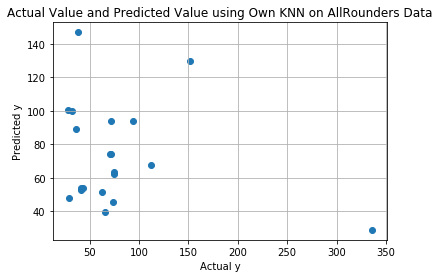

In [85]:
neighbors=[1,2,3,4,5,6,7,8,9]
best_neighbors_cv_KNN_own_All=KNNRegressorOwnTraining(Xtrn_All_KNN,ytrn_All_KNN,Xcv_All_KNN,ycv_All_KNN,neighbors)

y_pred_knn_own_All=KNNRegressionOwn(Xtrn_All_KNN,ytrn_All_KNN,best_neighbors_cv_KNN_own_All,Xtst_All_KNN)
KNNReg_own_test_table_All=PrettyTable()
KNNReg_own_test_table_All.field_names = ["Neighbors","Test Error"]
KNNReg_own_test_table_All.add_row([best_neighbors_cv_KNN_own_All,math.sqrt(mean_squared_error(ytst_All_KNN,y_pred_knn_own_All))])

print(KNNReg_own_test_table_All)

plt.scatter(ytst_All_KNN,y_pred_knn_own_All)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Own KNN on AllRounders Data')
plt.show()

### Weighted KNN Own

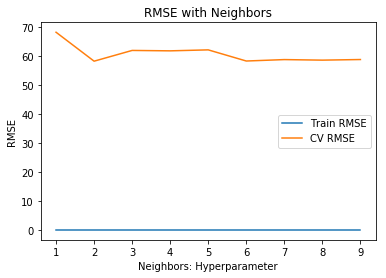

+-----------+------------------------+
| Neighbors |      Train Error       |
+-----------+------------------------+
|     1     |          0.0           |
|     2     | 1.0814765319822562e-05 |
|     3     | 1.314270285744526e-05  |
|     4     |  1.64165170546383e-05  |
|     5     | 1.8566148389759893e-05 |
|     6     | 2.0718246172761497e-05 |
|     7     |  2.20950752453253e-05  |
|     8     | 2.313233771725277e-05  |
|     9     | 2.4677276866382032e-05 |
+-----------+------------------------+
+-----------+--------------------+
| Neighbors |      CV Error      |
+-----------+--------------------+
|     1     | 68.16890786861705  |
|     2     | 58.191542985976824 |
|     3     | 61.89606050390543  |
|     4     | 61.753811146584354 |
|     5     | 62.09120738738993  |
|     6     | 58.24650626274695  |
|     7     | 58.737817258744506 |
|     8     | 58.54825783806649  |
|     9     | 58.75912010547479  |
+-----------+--------------------+
Best No.of Neighbors is: 2
+----------

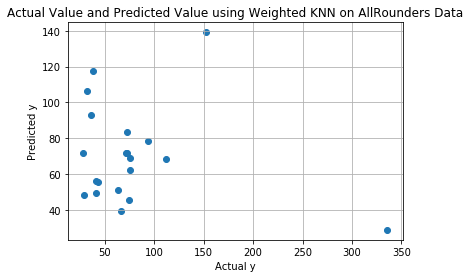

In [86]:
neighbors=[1,2,3,4,5,6,7,8,9]
KNNReg_own_weighted_test_table_All=PrettyTable()
best_neighbors_cv_KNN_Weighted_own_All=KNNRegressionOwnWeightedTraining(Xtrn_All_KNN,ytrn_All_KNN,Xcv_All_KNN,ycv_All_KNN,neighbors)

y_pred_knn_own_weighted_All=KNNRegressionOwnWeighted(Xtrn_All_KNN,ytrn_All_KNN,best_neighbors_cv_KNN_Weighted_own_All,Xtst_All_KNN)

KNNReg_own_weighted_test_table_All.field_names = ["Neighbors","Test Error"]
KNNReg_own_weighted_test_table_All.add_row([best_neighbors_cv_KNN_own_All,math.sqrt(mean_squared_error(ytst_All_KNN,y_pred_knn_own_weighted_All))])
print(KNNReg_own_weighted_test_table_All)

plt.scatter(ytst_All_KNN,y_pred_knn_own_weighted_All)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual Value and Predicted Value using Weighted KNN on AllRounders Data')
plt.show()

### Algorithm for predicting IPL Winner

In [87]:
from array import array

def logScale(x,Stdscaler):
    x_log=np.log(x)
    x_log_std=Stdscaler.transform(x_log)
    return x_log_std


def getOutput(player,cate,model):
    print(player)
    if cate == 'allrounder':
        allRound_stats=player[0:4]+player[6:14]
        allRound_stats_Arr=np.asarray(allRound_stats,dtype=float)
        allRound_stats_Arr=logScale(allRound_stats_Arr.reshape(1,-1),Stdscaler_All)
        #print("Stats is",allRound_stats_Arr)
        #print("Predicted value is",sgd_reg_test_All.predict(allRound_stats_Arr.reshape(1,-1)))
        return model.predict(allRound_stats_Arr)
    elif cate == 'bowler':
        bowler_stats=player[0:5]
        bowler_stats_Arr=np.asarray(bowler_stats,dtype=float)
        bowler_stats_Arr=logScale(bowler_stats_Arr.reshape(1,-1),Stdscaler_Bowl)
        return model.predict(bowler_stats_Arr)
    else:
        batsmen_stats=player[0:4]+player[6:9]
        batsmen_stats_Arr=np.asarray(batsmen_stats,dtype=float)
        batsmen_stats_Arr=logScale(batsmen_stats_Arr.reshape(1,-1),Stdscaler_Bat)
        return model.predict(batsmen_stats_Arr)

def appendOutput(output,team,cate,country,final):
    if team in final:
        pass
    else:
        final[team] = list()
    final[team].append(list([output, cate, country]))
    
def getBest11(tup):
    sorted(tup, key=lambda x: x[0],reverse=True)
    reqBat = 4
    reqWk = 1
    reqAll = 2
    reqBow = 4
    MaxFor = 4
    currFor = 0
    curr = 0
    maxPlayers = 11

    team = list()
    for item in tup:
        if curr == maxPlayers:
            break
        if item[2] == 'F' and currFor == MaxFor:
            continue
        if item[1] == 'batsmen':
            if reqBat == 0:
                continue
            reqBat = reqBat - 1 
            curr = curr + 1              
            team.append(item)
        elif item[1] == 'bowler':
            if reqBow == 0:
                continue
            reqBow = reqBow - 1
            curr = curr + 1
            team.append(item)
        elif item[1] == 'wicketkeeper':
            if reqWk == 0:
                if reqBat == 0:
                    continue
                else:
                    reqBat = reqBat - 1
            else:
                reqWk = reqWk - 1
            team.append(item)
            curr = curr + 1
        else:
            if reqAll == 0:
                continue
            else:
                reqAll = reqAll - 1
            team.append(item)
            curr = curr + 1
        if item[2] == 'F':
            currFor = currFor + 1
    return team



In [88]:
from csv import reader
with open('ipl_Updated.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    rows = list(csv_reader)
data = {}
for row in rows:
    if row[0] in data:
        pass
    else:
        data[row[0]] = {}
    if row[2] in data[row[0]]:
        pass
    else:
        data[row[0]][row[2]] = dict()
    if row[20] in data[row[0]][row[2]]:
        pass
    else:
        data[row[0]][row[2]][row[20]] = list()
    data[row[0]][row[2]][row[20]].append(row)

final = {}

for team in data:
    for cate in data[team]:
        for country in data[team][cate]:
            for player in data[team][cate][country]:
                if cate == 'allrounder':
                    player = player[4:]
                    allRound_stats=player[0:4]+player[6:14]
                    allRound_stats_Arr=np.asarray(allRound_stats,dtype=float)
                    allRound_stats_Arr=logScale(allRound_stats_Arr.reshape(1,-1),Stdscaler_All)
                    output = predictSGDOwn(allRound_stats_Arr,w_All,b_All)
                    appendOutput(output[0], team, cate, country, final)
                elif cate == 'bowler':
                    player = player[4:]
                    bowler_stats=player[0:5]
                    bowler_stats_Arr=np.asarray(bowler_stats,dtype=float)
                    bowler_stats_Arr=logScale(bowler_stats_Arr.reshape(1,-1),Stdscaler_Bowl)
                    output = predictSGDOwn(bowler_stats_Arr,w_Bowl,b_Bowl)
                    appendOutput(output[0], team, cate, country, final)
                else:
                    player = player[4:]
                    batsmen_stats=player[0:4]+player[6:9]
                    batsmen_stats_Arr=np.asarray(batsmen_stats,dtype=float)
                    batsmen_stats_Arr=logScale(batsmen_stats_Arr.reshape(1,-1),Stdscaler_Bat)
                    output = predictSGDOwn(batsmen_stats_Arr,w_Bat,b_Bat)
                    appendOutput(output[0], team, cate, country, final)
                            

totalRating = dict()
for team in final:
    bTeam = getBest11(final[team])
    totalSum = 0
    for tup in bTeam:
        totalSum = totalSum + tup[0]
    totalRating[team] = totalSum 

print(totalRating)


#11
#5B,1WK,1AL,4B
#4F
#7





{'CSK': 5122.69296309085, 'DC': 5196.524130437427, 'KX1P': 4589.4830688264665, 'KKR': 2848.8926646115524, 'MI': 4999.64530097251, 'RR': 4726.176962185898, 'RCB': 5170.61669544239, 'SRH': 5187.9250688788925}


In [89]:
homeFactor = 1.05
homeDefactor = 0.95

home = dict({ 
    "CSK":"Chennai",
    "RR":"Rajastan",
    "DC":"Delhi",
    "SRH":"Hyderabad",
    "MI":"Mumbai",
    "KKR":"Kolkata",
    "RCB":"Bengaluru",
    "KX1P":"Punjab",
})

def pwinner(team1, team2, considerHF):
    if considerHF:
        if homeFactor*totalRating[team1] >= homeDefactor*totalRating[team2]:
            return team1
        else:
            return team2
    if totalRating[team1] >= totalRating[team2]:
        return team1
    else:
        return team2

import random
list_of_teams = list({"CSK", "MI", "RR", "KKR", "DC", "RCB", "SRH", "KX1P"})
matches = set()
totalLeagueMatches = 56
i=1

pointsTable = {}
for t in list_of_teams:
    pointsTable[t] = 0
while i <= totalLeagueMatches:
    curr = random.sample(list_of_teams, 2)
    if curr[0]+curr[1] in matches:
        continue
    matches.add(curr[0]+curr[1])
    venue = curr[0]
    winner = pwinner(curr[0], curr[1], True)
    pointsTable[winner] = pointsTable[winner] + 2
    print(curr[0]+"  vs  " +curr[1] + "   ||    venue at " + venue)
    print("Winner is "+ winner +"\n")
    i=i+1
import operator
pointsTable = sorted(pointsTable.items(), key=operator.itemgetter(1), reverse=True)

print("Qualifier1:")
print(pointsTable[0][0]+"  vs  " +pointsTable[1][0])
qual1=pwinner(pointsTable[0][0],pointsTable[1][0],False)
qual1L=pointsTable[1][0] if(qual1==pointsTable[0][0]) else pointsTable[0][0]
print("Winner is " + qual1+"\n")

print("Eliminator:")
print(pointsTable[2][0] + "  vs  "+pointsTable[3][0])
elemW = pwinner(pointsTable[2][0],pointsTable[3][0],False)
print("Winner is " + elemW+"\n")


print("Qualifier2:")
print(qual1L+"  vs  " +elemW)
qual2=pwinner(qual1L,elemW,False)
print("Winner is " + qual2+"\n")

print("******FINAL******")
print(qual1+"  vs  " +qual2)
finalWinner = pwinner(qual1, qual2, False)
print("Winner is " + finalWinner+"\n")

print(finalWinner)

MI  vs  KX1P   ||    venue at MI
Winner is MI

CSK  vs  SRH   ||    venue at CSK
Winner is CSK

RR  vs  KKR   ||    venue at RR
Winner is RR

MI  vs  CSK   ||    venue at MI
Winner is MI

RCB  vs  SRH   ||    venue at RCB
Winner is RCB

KX1P  vs  RR   ||    venue at KX1P
Winner is KX1P

DC  vs  RR   ||    venue at DC
Winner is DC

CSK  vs  RR   ||    venue at CSK
Winner is CSK

SRH  vs  KX1P   ||    venue at SRH
Winner is SRH

KKR  vs  DC   ||    venue at KKR
Winner is DC

DC  vs  SRH   ||    venue at DC
Winner is DC

CSK  vs  MI   ||    venue at CSK
Winner is CSK

CSK  vs  DC   ||    venue at CSK
Winner is CSK

MI  vs  SRH   ||    venue at MI
Winner is MI

KX1P  vs  MI   ||    venue at KX1P
Winner is KX1P

KX1P  vs  DC   ||    venue at KX1P
Winner is DC

CSK  vs  KKR   ||    venue at CSK
Winner is CSK

MI  vs  RR   ||    venue at MI
Winner is MI

DC  vs  RCB   ||    venue at DC
Winner is DC

KKR  vs  SRH   ||    venue at KKR
Winner is SRH

RR  vs  RCB   ||    venue at RR
Winner is RR


In [90]:
final = {}

for team in data:
    for cate in data[team]:
        for country in data[team][cate]:
            for player in data[team][cate][country]:
                if cate == 'allrounder':
                    player = player[4:]
                    allRound_stats=player[0:4]+player[6:14]
                    allRound_stats_Arr=np.asarray(allRound_stats,dtype=float)
                    allRound_stats_Arr=logScale(allRound_stats_Arr.reshape(1,-1),Stdscaler_All)
                    output = KNNRegressionOwn(Xtrn_All,ytrn_All,best_neighbors_cv_KNN_own_All,allRound_stats_Arr)
                    appendOutput(output[0], team, cate, country, final)
                elif cate == 'bowler':
                    player = player[4:]
                    bowler_stats=player[0:5]
                    bowler_stats_Arr=np.asarray(bowler_stats,dtype=float)
                    bowler_stats_Arr=logScale(bowler_stats_Arr.reshape(1,-1),Stdscaler_Bowl)
                    output = KNNRegressionOwn(Xtrn_Bowl,ytrn_Bowl,best_neighbors_cv_KNN_own_Bowl,bowler_stats_Arr)
                    appendOutput(output[0], team, cate, country, final)
                else:
                    player = player[4:]
                    batsmen_stats=player[0:4]+player[6:9]
                    batsmen_stats_Arr=np.asarray(batsmen_stats,dtype=float)
                    batsmen_stats_Arr=logScale(batsmen_stats_Arr.reshape(1,-1),Stdscaler_Bat)
                    output = KNNRegressionOwn(Xtrn_Bat,ytrn_Bat,best_neighbors_cv_KNN_own_Bat,batsmen_stats_Arr)
                    appendOutput(output[0], team, cate, country, final)
                            

totalRating = dict()
for team in final:
    bTeam = getBest11(final[team])
    totalSum = 0
    for tup in bTeam:
        totalSum = totalSum + tup[0]
    totalRating[team] = totalSum 

print(totalRating)


{'CSK': 5152.75, 'DC': 5039.053571428572, 'KX1P': 4329.660714285714, 'KKR': 4141.142857142857, 'MI': 5057.625, 'RR': 4682.857142857142, 'RCB': 4799.517857142857, 'SRH': 4685.571428571428}


In [91]:
pointsTable = {}
for t in list_of_teams:
    pointsTable[t] = 0
i=1
matches = set()

while i <= totalLeagueMatches:
    curr = random.sample(list_of_teams, 2)
    if curr[0]+curr[1] in matches:
        continue
    matches.add(curr[0]+curr[1])
    venue = curr[0]
    winner = pwinner(curr[0], curr[1], True)
    pointsTable[winner] = pointsTable[winner] + 2
    print(curr[0]+"  vs  " +curr[1] + "   ||    venue at " + venue)
    print("Winner is "+ winner +"\n")
    i=i+1
import operator
pointsTable = sorted(pointsTable.items(), key=operator.itemgetter(1), reverse=True)

print("Qualifier1:")
print(pointsTable[0][0]+"  vs  " +pointsTable[1][0])
qual1=pwinner(pointsTable[0][0],pointsTable[1][0],False)
qual1L=pointsTable[1][0] if(qual1==pointsTable[0][0]) else pointsTable[0][0]
print("Winner is " + qual1+"\n")

print("Eliminator:")
print(pointsTable[2][0] + "  vs  "+pointsTable[3][0])
elemW = pwinner(pointsTable[2][0],pointsTable[3][0],False)
print("Winner is " + elemW+"\n")


print("Qualifier2:")
print(qual1L+"  vs  " +elemW)
qual2=pwinner(qual1L,elemW,False)
print("Winner is " + qual2+"\n")

print("******FINAL******")
print(qual1+"  vs  " +qual2)
finalWinner = pwinner(qual1, qual2, False)
print("Winner is " + finalWinner+"\n")

print(finalWinner)

RCB  vs  MI   ||    venue at RCB
Winner is RCB

DC  vs  KX1P   ||    venue at DC
Winner is DC

RCB  vs  KKR   ||    venue at RCB
Winner is RCB

CSK  vs  DC   ||    venue at CSK
Winner is CSK

DC  vs  RCB   ||    venue at DC
Winner is DC

RCB  vs  RR   ||    venue at RCB
Winner is RCB

RR  vs  KX1P   ||    venue at RR
Winner is RR

DC  vs  KKR   ||    venue at DC
Winner is DC

DC  vs  RR   ||    venue at DC
Winner is DC

RCB  vs  DC   ||    venue at RCB
Winner is RCB

SRH  vs  KX1P   ||    venue at SRH
Winner is SRH

CSK  vs  SRH   ||    venue at CSK
Winner is CSK

KKR  vs  DC   ||    venue at KKR
Winner is DC

SRH  vs  CSK   ||    venue at SRH
Winner is SRH

RR  vs  MI   ||    venue at RR
Winner is RR

MI  vs  RCB   ||    venue at MI
Winner is MI

RR  vs  RCB   ||    venue at RR
Winner is RR

RR  vs  SRH   ||    venue at RR
Winner is RR

CSK  vs  KKR   ||    venue at CSK
Winner is CSK

RR  vs  DC   ||    venue at RR
Winner is RR

RCB  vs  CSK   ||    venue at RCB
Winner is RCB

MI  vs 